<a href="https://colab.research.google.com/github/BenjaminJolyENSAE2020/Deep_learning_ensae_2020/blob/master/CycleGAN_Grignon_Joly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEEP LEARNING - ENSAE - mai 2020**

Grignon Paul - Joly Benjamin

# Source du code CycleGAN

Pour réaliser ce CycleGAN, nous nous sommes inspirés du travail proposé sur le site https://rubikscode.net/2019/02/11/implementing-cyclegan-using-python/ . Ils ont réalisé un cycleGAN entre une base de photos et une base de tableaux de Monet, toutes deux avec des images de dimensions 256x256 en RGB.

# I - Importation des modules importants

In [1]:
!pip uninstall scipy -y
!pip install scipy==1.0.0

Uninstalling scipy-1.4.1:
  Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 50.0MB 72kB/s 
ERROR: umap-learn 0.4.2 has requirement scipy>=1.3.1, but you'll have scipy 1.0.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.0.0 which is incompatible.
ERROR: seaborn 0.10.1 has requirement scipy>=1.0.1, but you'll have scipy 1.0.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: cvxpy 1.0.31 has requirement scipy>=1.1.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [2]:
import scipy
scipy.__version__

'1.0.0'

In [0]:
#!pip install q keras==2.2.4

     |████████████████████████████████| 317kB 4.1MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [0]:
#!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.5MB 57kB/s 
     |████████████████████████████████| 368kB 46.0MB/s 
     |████████████████████████████████| 3.2MB 45.8MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0rc4
    Uninstalling tensorflow-2.2.0rc4:
      Successfully uninstalled tensorflow-2.2.0rc4


In [3]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [5]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-187o6ozk
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-187o6ozk
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=5bba592a86af2d127405b5ac3b809403b02a255eab4d964b3e6f0620bd92e22b
  Stored in directory: /tmp/pip-ephem-wheel-cache-jj0f5auw/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


** Saving the databases 

In [6]:
%cd /content/

/content


# II - Loading and preprocessing the first database (MNIST)

## A - Importation

We have to upload our MNIST database (.gz files)

In [7]:
# Author: Ian Burke
# Module: Emerging Technologies
# Mnist Reader Problem sheet

#Problem Sheet: https://emerging-technologies.github.io/problems/digits.html
#import the following python libraries:
import gzip
# In shell, run pip install image..
from PIL import Image #image library
import numpy as np 

# Question 1 - Read the data files
# Download the image and label files. 
# Have Python decompress and read them byte by byte into appropriate data structures in memory.

#function to read label files
def read_labels_from_file(filename):
    with gzip.open(filename,'rb') as f: #use gzip to open the file in read binary mode
        magic = f.read(4) # magic number is the first 4 bytes
        magic = int.from_bytes(magic,'big') # Convert bytes to integers.
        print("Magic is:", magic) # print to console

        # the same as above but with labels
        nolab = f.read(4)
        nolab = int.from_bytes(nolab,'big')
        print("Num of labels is:", nolab)
        # for looping through labels
        labels = [f.read(1) for i in range(nolab)]
        labels = [int.from_bytes(label, 'big') for label in labels]
    return labels
print()
train_labels = read_labels_from_file("train-labels-idx1-ubyte.gz")
test_labels = read_labels_from_file("t10k-labels-idx1-ubyte.gz")

def read_images_from_file(filename):
    with gzip.open(filename,'rb') as f:
        magic = f.read(4)
        magic = int.from_bytes(magic,'big')
        print("Magic is:", magic)

        # Number of images in next 4 bytes
        noimg = f.read(4)
        noimg = int.from_bytes(noimg,'big')
        print("Number of images is:", noimg)

        # Number of rows in next 4 bytes
        norow = f.read(4)
        norow = int.from_bytes(norow,'big')
        print("Number of rows is:", norow)
        
        # Number of columns in next 4 bytes
        nocol = f.read(4)
        nocol = int.from_bytes(nocol,'big')
        print("Number of cols is:", nocol)

        images = [] # create array
        #for loop
        for i in range(noimg):
            rows = []
            for r in range(norow):
                cols = []
                for c in range(nocol):
                    cols.append(int.from_bytes(f.read(1), 'big')) # append the current byte for every column
                rows.append(cols) # append columns array for every row
            images.append(rows) # append rows for every image
    return images
print() #line break

# Call the functions and run them to read the files
train_images = read_images_from_file("train-images-idx3-ubyte.gz")
test_images = read_images_from_file("t10k-images-idx3-ubyte.gz")

# Question 2 - Output an image to the console
# Output the third image in the training set to the console.
# Do this by representing any pixel value less than 128 as a full stop and any other pixel value as a hash symbol.
print('Affichage :')
for row in train_images[4999]:
    for col in row: 
        print('.' if col <= 127 else '#', end='')
    print()

print('Fin - Affichage')

# Question 3 - Output the image files as PNGs
# Download the image and label files. 
# Have Python decompress and read them byte by byte into appropriate data structures in memory.
img0 = Image.fromarray(np.array(train_images[4999]).astype('uint8'))
img0 = img0.convert('RGB') # convert into rgb format
img0.show() # display image in window
img0.save('train-4999-2.png') # save the image file as png


Magic is: 2049
Num of labels is: 60000
Magic is: 2049
Num of labels is: 10000

Magic is: 2051
Number of images is: 60000
Number of rows is: 28
Number of cols is: 28
Magic is: 2051
Number of images is: 10000
Number of rows is: 28
Number of cols is: 28
Affichage :
............................
............................
............................
............................
............###.............
...........######...........
...........#######..........
...........##...###.........
..........##.....##.........
..........##.....##.........
..........##......#.........
.................##.........
................###.........
...............###..........
..............###...........
..............##............
........########............
.......########.............
........#######.............
........########............
.........##...####..........
................####........
.................####.......
...................###......
............................
...........

In [8]:
print('type des données dans les images :', np.array(train_images[4999]).dtype)

type des données dans les images : int64


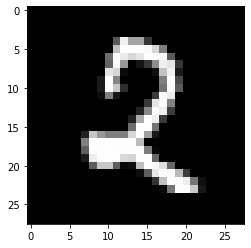

In [9]:
# https://www.f-legrand.fr/scidoc/docmml/image/niveaux/images/images.html

import imageio
import numpy
from matplotlib.pyplot import *

img = imread("/content/train-4999-2.png")

figure(figsize=(4,4))
imshow(img,cmap='gray')

In [10]:
# Training set : 60 000 img de taille 28x28

len(train_images), len(train_images[0]), len(train_images[0][0])

(60000, 28, 28)

In [11]:
# Test set : 10 000 img de taille 28x28

len(test_images), len(test_images[0]), len(test_images[0][0])

(10000, 28, 28)

**Creation of the directories needed**

In [0]:
!mkdir /content/MNIST_to_USPS/

In [0]:
!mkdir /content/rawimages_train_mnist/

In [0]:
!mkdir /content/rawimages_test_mnist/

In [15]:
import os 
os.listdir

<function posix.listdir>

**Loading of the raw images**

In [16]:
%cd /content/rawimages_train_mnist/
import numpy as np

taille = len(train_images)

for i in range(taille):
  img = Image.fromarray(np.array(train_images[i]).astype('uint8'))
  img = img.convert('RGB') # convert into rgb format
  img.show() # display image in window
  path = 'train' + str(i) + '.png'
  img.save(path) # save the image file as png
print('Sauvegarde terminée !')

/content/rawimages_train_mnist
Sauvegarde terminée !


In [17]:
%cd /content/rawimages_test_mnist/
import numpy as np

taille = len(test_images)

for i in range(taille):
  img = Image.fromarray(np.array(test_images[i]).astype('uint8'))
  img = img.convert('RGB') # convert into rgb format
  img.show() # display image in window
  path = 'test' + str(i) + '.png'
  img.save(path) # save the image file as png
print('Sauvegarde terminée !')

/content/rawimages_test_mnist
Sauvegarde terminée !


## B - Resizing

**Changing the size of the images**

In [18]:
%cd /content

/content


In [19]:
import cv2
import glob
import os

inputFolder = "/content/rawimages_train_mnist"
folderLen=len(inputFolder)
os.mkdir('/content/MNIST_to_USPS/trainA')
i=0
for img in glob.glob(inputFolder+"/*.png"): 
  image = cv2.imread(img)
  imgResized = cv2.resize(image,(128,128))
  cv2.imwrite("/content/MNIST_to_USPS/trainA" + img[folderLen:], imgResized)
  i += 1
  cv2.waitKey(30)

print('Resizing finished !')

Resizing finished !


In [20]:
import cv2
import glob
import os

inputFolder = "/content/rawimages_test_mnist"
folderLen=len(inputFolder)
os.mkdir('/content/MNIST_to_USPS/testA')
i=0
for img in glob.glob(inputFolder+"/*.png"): 
  image = cv2.imread(img)
  imgResized = cv2.resize(image,(128,128))
  cv2.imwrite("/content/MNIST_to_USPS/testA" + img[folderLen:], imgResized)
  i += 1
  cv2.waitKey(30)

print('Resizing finished !')

Resizing finished !


## C - Visualisation

**Visualization of the results**

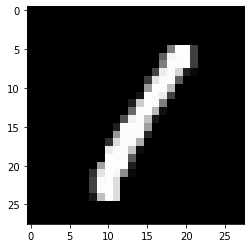

In [21]:
#Visualization sur le training set avant redimensionnement
import imageio
import numpy
from matplotlib.pyplot import *

img = imread("/content/rawimages_train_mnist/train3.png")

figure(figsize=(4,4))
imshow(img,cmap='gray')

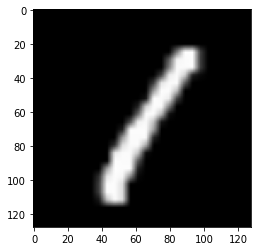

In [22]:
#Visualization sur le training set après redimensionnement
import imageio
import numpy
from matplotlib.pyplot import *

img = imread("/content/MNIST_to_USPS/trainA/train3.png")

figure(figsize=(4,4))
imshow(img,cmap='gray')

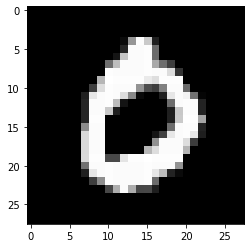

In [23]:
#Visualization sur le test set avant redimensionnement
import imageio
import numpy
from matplotlib.pyplot import *

img = imread("/content/rawimages_test_mnist/test3.png")

figure(figsize=(4,4))
imshow(img,cmap='gray')

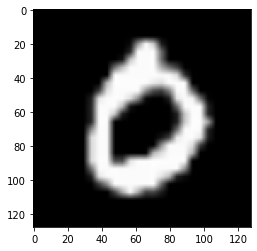

In [24]:
#Visualization sur le test set avant redimensionnement
import imageio
import numpy
from matplotlib.pyplot import *

img = imread("/content/MNIST_to_USPS/testA/test3.png")

figure(figsize=(4,4))
imshow(img,cmap='gray')

# III - Loading and preprocessing the second database (USPS)

## A - Importation

**Importation from Kaggle**

We have to upload the USPS database ('usps.h5')

In [0]:
import h5py
path = "/content/usps.h5"
with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

In [26]:
print('Nombre d images dans le train_set :', X_tr.shape[0])
print('Taille des images dans le train_set :', X_tr.shape[1])
print(' ')
print('Nombre d images dans le test_set :', X_te.shape[0])
print('Taille des images dans le test_set :', X_te.shape[1])

Nombre d images dans le train_set : 7291
Taille des images dans le train_set : 256
 
Nombre d images dans le test_set : 2007
Taille des images dans le test_set : 256


**Loading of the raw images**

In [0]:
!mkdir /content/rawimages_train_usps/

In [28]:
%cd /content/rawimages_train_usps/
import numpy as np

taille = len(X_tr)

for i in range(taille):
  img = np.array(X_tr[i])
  img = img.reshape(16,16)
  img = (img * 255).astype(np.uint8)
  img = Image.fromarray(img.astype('uint8'))
  img = img.convert('RGB') # convert into rgb format
  img.show() # display image in window
  path = 'train' + str(i) + '.png'
  img.save(path) # save the image file as png
print('Sauvegarde terminée !')

/content/rawimages_train_usps
Sauvegarde terminée !


In [0]:
!mkdir /content/rawimages_test_usps/

In [30]:
%cd /content/rawimages_test_usps/
import numpy as np

taille = len(X_te)

for i in range(taille):
  img = np.array(X_te[i])
  img = img.reshape(16,16)
  img = (img * 255).astype(np.uint8)
  img = Image.fromarray(img.astype('uint8'))
  img = img.convert('RGB') # convert into rgb format
  img.show() # display image in window
  path = 'test' + str(i) + '.png'
  img.save(path,"PNG") # save the image file as png
print('Sauvegarde terminée !')

/content/rawimages_test_usps
Sauvegarde terminée !


## B - Resizing

**Changing the size of the images**

In [31]:
import cv2
import glob
import os

inputFolder = "/content/rawimages_train_usps"
folderLen=len(inputFolder)
os.mkdir('/content/MNIST_to_USPS/trainB')
i=0
for img in glob.glob(inputFolder+"/*.png"): 
  image = cv2.imread(img)
  imgResized = cv2.resize(image,(128,128))
  cv2.imwrite("/content/MNIST_to_USPS/trainB" + img[folderLen:], imgResized)
  i += 1
  cv2.waitKey(30)

print('Resizing finished !')

Resizing finished !


In [32]:
import cv2
import glob
import os

inputFolder = "/content/rawimages_test_usps"
folderLen=len(inputFolder)
os.mkdir('/content/MNIST_to_USPS/testB')
i=0
for img in glob.glob(inputFolder+"/*.png"): 
  image = cv2.imread(img)
  imgResized = cv2.resize(image,(128,128))
  cv2.imwrite("/content/MNIST_to_USPS/testB" + img[folderLen:], imgResized)
  i += 1
  cv2.waitKey(30)

print('Resizing finished !')

Resizing finished !


## C - Visualisation

**Visualization of results**

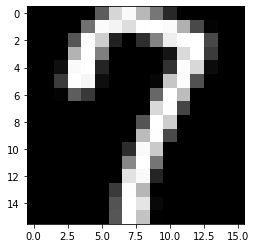

In [33]:
#Visualization sur le training set avant redimensionnement
import imageio
import numpy
from matplotlib.pyplot import *

img = imread("/content/rawimages_train_usps/train3.png")

figure(figsize=(4,4))
imshow(img,cmap='gray')

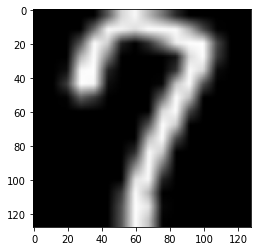

In [34]:
#Visualization sur le training set après redimnesionnement
import imageio
import numpy
from matplotlib.pyplot import *

img = imread("/content/MNIST_to_USPS/trainB/train3.png")

figure(figsize=(4,4))
imshow(img,cmap='gray')

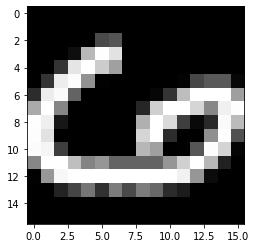

In [35]:
#Visualization sur le training set avant redimensionnement
import imageio
import numpy
from matplotlib.pyplot import *

img = imread("/content/rawimages_test_usps/test3.png")

figure(figsize=(4,4))
imshow(img,cmap='gray')

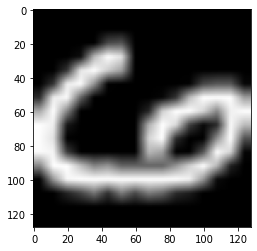

In [36]:
#Visualization sur le training set avant redimensionnement
import imageio
import numpy
from matplotlib.pyplot import *

img = imread("/content/MNIST_to_USPS/testB/test3.png")

figure(figsize=(4,4))
imshow(img,cmap='gray')

**Other method to check that the images are correctly displayed**

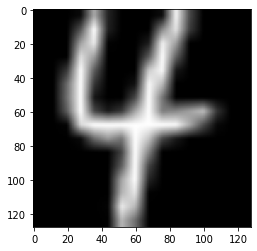

In [37]:
#Visualization sur le test set 
import imageio
import numpy
from matplotlib.pyplot import *

img = imread('/content/MNIST_to_USPS/testB/test1003.png')

figure(figsize=(4,4))
imshow(img,cmap='gray')

In [38]:
#Comparaison de l'affichage avec un seuillage 

print('Affichage :')
print(' ')
print('Label : ', y_te[1003])
img_test_2 = X_te[1003].reshape(16,16)

for i in range(16):
    for j in range(16): 
        print('.' if img_test_2[i][j] <= 0.9 else '#', end='')
    print()

print(' ')
print('Fin - Affichage')


Affichage :
 
Label :  4
..........#.....
....#...........
....#....#......
.........#......
...#.....#......
...#....#.......
...#....#.......
...#....#.......
....#######.....
.......#........
.......#........
.......#........
.......#........
.......#........
......#.........
................
 
Fin - Affichage


# IV - Creation of tensors (128,128,3)

We reshape our data in tensors of shape (128,128,3) because our model needs this shape as input.

In [0]:
os.mkdir('/content/BDD_tensor/')

In [40]:
import cv2
import glob
import os

inputFolder = "/content/rawimages_train_mnist"
folderLen=len(inputFolder)
os.mkdir('/content/BDD_tensor/trainA')
i=0
for img in glob.glob(inputFolder+"/*.png"): 
  image = cv2.imread(img)
  imgResized = cv2.resize(image,(128,128))

  Z = np.zeros(128*128*3)
  Z = Z.reshape(3,128,128)

  Z = imgResized

  cv2.imwrite("/content/BDD_tensor/trainA/" + img[folderLen:], Z)
  i += 1
  cv2.waitKey(30)

print('Resizing finished !')

Resizing finished !


In [41]:
import cv2
import glob
import os

inputFolder = "/content/rawimages_test_mnist"
folderLen=len(inputFolder)
os.mkdir('/content/BDD_tensor/testA')
i=0
for img in glob.glob(inputFolder+"/*.png"): 
  image = cv2.imread(img)
  imgResized = cv2.resize(image,(128,128))

  Z = np.zeros(128*128*3)
  Z = Z.reshape(3,128,128)

  Z = imgResized

  cv2.imwrite("/content/BDD_tensor/testA/" + img[folderLen:], Z)
  i += 1
  cv2.waitKey(30)

print('Resizing finished !')

Resizing finished !


In [42]:
import cv2
import glob
import os

inputFolder = "/content/rawimages_train_usps"
folderLen=len(inputFolder)
os.mkdir('/content/BDD_tensor/trainB')
i=0
for img in glob.glob(inputFolder+"/*.png"): 
  image = cv2.imread(img)
  imgResized = cv2.resize(image,(128,128))

  Z = np.zeros(128*128*3)
  Z = Z.reshape(3,128,128)

  Z = imgResized

  cv2.imwrite("/content/BDD_tensor/trainB/" + img[folderLen:], Z)
  i += 1
  cv2.waitKey(30)


print('Resizing finished !')

Resizing finished !


In [43]:
import cv2
import glob
import os

inputFolder = "/content/rawimages_test_usps"
folderLen=len(inputFolder)
os.mkdir('/content/BDD_tensor/testB')
i=0
for img in glob.glob(inputFolder+"/*.png"): 
  image = cv2.imread(img)
  imgResized = cv2.resize(image,(128,128))

  Z = np.zeros(128*128*3)
  Z = Z.reshape(3,128,128)

  Z = imgResized

  cv2.imwrite("/content/BDD_tensor/testB/" + img[folderLen:], Z)
  i += 1
  cv2.waitKey(30)

print('Resizing finished !')

Resizing finished !


# V - Definition of the Cycle GAN

In [0]:
import os
import numpy as np
from glob import glob
import scipy
import matplotlib.pyplot as plt

class ImageHelper(object):

  #Method to save images used during training. It displays results
    def save_image(self, plot_images, epoch):
        os.makedirs('cycle_gan_images', exist_ok=True)
        titles = ['Original', 'Transformed']
        fig, axs = plt.subplots(2, 2)
        cnt = 0
        for i in range(2):
            for j in range(2):
                axs[i,j].imshow(plot_images[cnt])
                axs[i, j].set_title(titles[j])
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("cycle_gan_images/{}".format(epoch))
        plt.close()

  #Plots 20 images from the defined path
    def plot20(self, images_paths_array):
        plt.figure(figsize=(10, 8))
        for i in range(20):
            img = plt.imread(images_paths_array[i])
            plt.subplot(4, 5, i+1)
            plt.imshow(img)
            plt.title(img.shape)
            plt.xticks([])
            plt.yticks([])
        plt.tight_layout()
        plt.show()
    
    #Loads  the image in the memory from the predefined location 
    def load_image(self, path):
        return scipy.misc.imread(path, mode='RGB').astype(np.float)
    
    #Loads random images from the test folder, one by domain
    def load_testing_image(self, path):
        self.img_res=(128, 128)
        path_X = glob(path + "/testA/*.png")
        path_Y = glob(path + "/testB/*.png")

        image_X = np.random.choice(path_X, 1)
        image_Y = np.random.choice(path_Y, 1)
        
        img_X = self.load_image(image_X[0])
        img_X = scipy.misc.imresize(img_X, self.img_res)
        if np.random.random() > 0.5:
            img_X = np.fliplr(img_X)
        img_X = np.array(img_X)/127.5 - 1.
        img_X = np.expand_dims(img_X, axis=0)
        
        img_Y = self.load_image(image_Y[0])
        img_Y = scipy.misc.imresize(img_Y, self.img_res)
        if np.random.random() > 0.5:
            img_X = np.fliplr(img_X)
        img_Y = np.array(img_Y)/127.5 - 1.
        img_Y = np.expand_dims(img_Y, axis=0)
        
        return (img_X, img_Y)

   #Loads batch of train images (from the train folder) from both domains 
    def load_batch_of_train_images(self, path, batch_size=1):
        self.img_res=(128, 128)
        path_X = glob(path + "/trainA/*.png")
        path_Y = glob(path + "/trainB/*.png")
        
        self.n_batches = int(min(len(path_X), len(path_Y)) / batch_size)
        total_samples = self.n_batches * batch_size

        path_X = np.random.choice(path_X, total_samples, replace=False)
        path_Y = np.random.choice(path_Y, total_samples, replace=False)
        
        for i in range(self.n_batches-1):
            batch_A = path_X[i*batch_size:(i+1)*batch_size]
            batch_B = path_Y[i*batch_size:(i+1)*batch_size]
            imgs_A, imgs_B = [], []
            for img_A, img_B in zip(batch_A, batch_B):
                img_A = self.load_image(img_A)
                img_B = self.load_image(img_B)

                img_A = scipy.misc.imresize(img_A, self.img_res)
                img_B = scipy.misc.imresize(img_B, self.img_res)

                imgs_A.append(img_A)
                imgs_B.append(img_B)

            imgs_A = np.array(imgs_A)/127.5 - 1.
            imgs_B = np.array(imgs_B)/127.5 - 1.

            yield imgs_A, imgs_B

In [0]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Keras modules
from keras.layers import Input, LeakyReLU, UpSampling2D, Conv2D, Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.models import Model
from keras.optimizers import Adam

# Torch
import torch
import torch.nn as nn

class CycleGAN(nn.Module):
  #CONSTRUCTOR (here parametrized constructor)
    def __init__(self, image_shape, cycle_lambda, image_hepler):

  #initialization of constructor class fields (cycle_lmabda, _image_helper, optimizer)
        self.optimizer = Adam(0.0002, 0.5) # learning_rate = 0.0002
        
        self.cycle_lambda = cycle_lambda 
        self.id_lambda = 0.1 * self.cycle_lambda
        self._image_helper = image_hepler
        self.img_shape = image_shape
        
        # Calculate output shape
        patch = int(self.img_shape[0] / 2**4)
        self.disc_patch = (patch, patch, 1)

        print("Build Discriminators...")
        self._discriminatorX = self._build_discriminator_model() #building the first discriminator
        self._compile_discriminator_model(self._discriminatorX) #compilation of the first discriminator
        self._discriminatorY = self._build_discriminator_model() #building the second discriminator
        self._compile_discriminator_model(self._discriminatorY) #compilation of the second discriminator
        
        print("Build Generators...") #creation of the two generators
        self._generatorXY = self._build_generator_model() 
        self._generatorYX = self._build_generator_model()        
        
        print("Build GAN...")
        self._build_and_compile_gan()

    #Only method that is mentionned as "public" (even if no such classes don't exist in Python)
    #It is mentionned with the absence of "_" at the beginning, as compared to other methods.
    #Model used with the image helper

    def train(self, epochs, batch_size, train_data_path):
        print("TRAINING ...")
        
        #Real/fake variables used during training 
        real = np.ones((batch_size,) + self.disc_patch)
        fake = np.zeros((batch_size,) + self.disc_patch)
        
        history_D = []

        history_G0 = []
        history_G1 = []
        history_G2 = []
        history_G3 = []
        history_G4 = []
        history_G5 = []
        history_G6 = []
        

        #Repetition of the following procedure over the whole number of epochs
        for epoch in range(epochs):
          
          #1. Reading of a batch of images from the training folder
            for i, (imagesX, imagesY) in enumerate(self._image_helper.load_batch_of_train_images(train_data_path, batch_size)):
                print ("---------------------------------------------------------")
                print ("****************** Epoch {} | Batch {} ***************************".format(epoch, i))
          
          #2. Pushing to the generator and reading the translated images 
                print("Generate images...")
                fakeY = self._generatorXY.predict(imagesX)
                fakeX = self._generatorYX.predict(imagesY)

          #3. Discriminators training 
                print("Train Discriminators...")
                discriminatorX_loss_real = self._discriminatorX.train_on_batch(imagesX, real)
                discriminatorX_loss_fake = self._discriminatorX.train_on_batch(fakeX, fake)
                discriminatorX_loss = 0.5 * np.add(discriminatorX_loss_real, discriminatorX_loss_fake)

                discriminatorY_loss_real = self._discriminatorY.train_on_batch(imagesY, real)
                discriminatorY_loss_fake = self._discriminatorY.train_on_batch(fakeY, fake)
                discriminatorY_loss = 0.5 * np.add(discriminatorY_loss_real, discriminatorY_loss_fake)

                mean_discriminator_loss = 0.5 * np.add(discriminatorX_loss, discriminatorY_loss)

            #4. Generators training    
                print("Train Generators...")
                generator_loss = self.gan.train_on_batch([imagesX, imagesY],
                                                        [real, real,
                                                        imagesX, imagesY,
                                                        imagesX, imagesY])

                print ("Discriminator loss: {}".format(mean_discriminator_loss[0]))
                print ("Generator loss: {}".format(generator_loss[0]))
                print ("---------------------------------------------------------")
                
                history_D.append({"D":mean_discriminator_loss[0]})

                history_G0.append({"G":generator_loss[0]})
                history_G1.append({"G":generator_loss[1]})
                history_G2.append({"G":generator_loss[2]})
                history_G3.append({"G":generator_loss[3]})
                history_G4.append({"G":generator_loss[4]})
                history_G5.append({"G":generator_loss[5]})
                history_G6.append({"G":generator_loss[6]})

                
                if i%100 ==0:
                    self._save_images("{}_{}".format(epoch, i), train_data_path)

        self._plot_loss(history_D)
        self._plot_loss(history_G0)
        self._plot_loss(history_G1)
        self._plot_loss(history_G2)
        self._plot_loss(history_G3)
        self._plot_loss(history_G4)
        self._plot_loss(history_G5)
        self._plot_loss(history_G6)
        #print(history)
        print(' ')
        print('TRAINING TERMINE !!')


 #DESCRIPTION OF HELPER METHODS 

  #Generator:  created using (i) encoding part ; (ii) transformer part ; (iii) decoder part 
  # - Encoding layers: for down-sampling
  # - Transformation layers : for applying styles
  # - Upsampling/decoding layers       

  #Encoding layers are built using convolutional layers
    def _encode__layer(self, input_layer, filters):
        layer = Conv2D(filters, kernel_size=4, strides=2, padding='same')(input_layer)
        layer = LeakyReLU(alpha=0.2)(layer)
        layer = InstanceNormalization()(layer)
        return layer

   #Transformational and decoding layers are created using upsampling layers.      
    def _decode_transform_layer(self, input_layer, forward_layer, filters):
        layer = UpSampling2D(size=2)(input_layer)
        layer = Conv2D(filters, kernel_size=4, strides=1, padding='same', activation='relu')(layer)
        layer = InstanceNormalization()(layer)
        layer = Concatenate()([layer, forward_layer])
        return layer

  #Connection of all methods : encoder, transformator and decoder
    def _build_generator_model(self):
        generator_input = Input(shape=self.img_shape)
        
        print("Build Encoder...")
        encode_layer_1 = self._encode__layer(generator_input, 32);
        encode_layer_2 = self._encode__layer(encode_layer_1, 64);
        encode_layer_3 = self._encode__layer(encode_layer_2, 128);
        encode_layer_4 = self._encode__layer(encode_layer_3, 256);
        
        print("Build Transformer - Decoder...")
        decode_transform_layer1 = self._decode_transform_layer(encode_layer_4, encode_layer_3, 128);
        decode_transform_layer2 = self._decode_transform_layer(decode_transform_layer1, encode_layer_2, 64);
        decode_transform_layer3 = self._decode_transform_layer(decode_transform_layer2, encode_layer_1, 32);
        
        generator_model = UpSampling2D(size = 2)(decode_transform_layer3)
        generator_model = Conv2D(self.img_shape[2], kernel_size=4, strides=1, padding='same', activation='tanh')(generator_model)
        
        final_generator_model = Model(generator_input, generator_model)
        final_generator_model.summary()
        return final_generator_model
        
    def _build_discriminator_model(self):
        discriminator_input = Input(shape=self.img_shape)
        discriminator_model = Conv2D(64, kernel_size=4, strides=2, padding='same')(discriminator_input)
        discriminator_model = LeakyReLU(alpha=0.2)(discriminator_model)
        discriminator_model = Conv2D(128, kernel_size=4, strides=2, padding='same')(discriminator_model)
        discriminator_model = LeakyReLU(alpha=0.2)(discriminator_model)
        discriminator_model = InstanceNormalization()(discriminator_model)
        discriminator_model = Conv2D(256, kernel_size=4, strides=2, padding='same')(discriminator_model)
        discriminator_model = LeakyReLU(alpha=0.2)(discriminator_model)
        discriminator_model = InstanceNormalization()(discriminator_model)
        discriminator_model = Conv2D(512, kernel_size=4, strides=2, padding='same')(discriminator_model)
        discriminator_model = LeakyReLU(alpha=0.2)(discriminator_model)
        discriminator_model = InstanceNormalization()(discriminator_model)        
        discriminator_model = Conv2D(1, kernel_size=4, strides=1, padding='same')(discriminator_model)
        
        return Model(discriminator_input, discriminator_model)
        
        #Rem : the discriminator is here a standard Convolutonal Neural Network. Detection if the image is coming from the desired domain

    def _compile_discriminator_model(self, model):
        model.compile(loss='binary_crossentropy',
            optimizer=self.optimizer,
            metrics=['accuracy'])
        model.summary()
    
    def _build_and_compile_gan(self):
        
        imageX = Input(shape=self.img_shape)
        imageY = Input(shape=self.img_shape)

        fakeY = self._generatorXY(imageX)
        fakeX = self._generatorYX(imageY)

        reconstructedX = self._generatorYX(fakeY)
        reconstructedY = self._generatorXY(fakeX)
        
        imageX_id = self._generatorYX(imageX)
        imageY_id = self._generatorXY(imageY)
        
        self._discriminatorX.trainable = False
        self._discriminatorY.trainable = False
        
        validX = self._discriminatorX(fakeX)
        validY = self._discriminatorY(fakeY)
        
        self.gan = Model(inputs=[imageX, imageY],
                          outputs=[ validX, validY,
                                    reconstructedX, reconstructedY,
                                    imageX_id, imageY_id ])
        self.gan.compile(loss=['mse', 'mse',
                                'mae', 'mae',
                                'mae', 'mae'],
                        loss_weights=[  1, 1,
                                        self.cycle_lambda, self.cycle_lambda,
                                        self.id_lambda, self.id_lambda ],
                        optimizer=self.optimizer)
        
        self.gan.summary()
    
    def _save_images(self, epoch, path):
        (img_X, img_Y) = self._image_helper.load_testing_image(path)
        
        fake_Y = self._generatorXY.predict(img_X)
        fake_X = self._generatorYX.predict(img_Y)

        plot_images = np.concatenate([img_X, fake_Y, img_Y, fake_X])

        # Rescale
        plot_images = 0.5 * plot_images + 0.5
        self._image_helper.save_image(plot_images, epoch)

        
    def _plot_loss(self, history):
        hist = pd.DataFrame(history)
        plt.figure(figsize=(20,5))
        for colnm in hist.columns:
            plt.plot(hist[colnm],label=colnm)
        plt.legend()
        plt.ylabel("loss")
        plt.xlabel("epochs")
        plt.show()

# VI - Implementation of the CycleGAN

##  GPU

Veuillez vérifier que le mode d'Exécution est mis sur "GPU" afin d'accélerer les calculs.

Pour se faire :
*  cliquez sur "Exécution"
*  cliquez sur "Modifier le type d'exécution"
* Sélectionnez "GPU" dans "Accélérateur matériel"

In [0]:
# to checkout the GPU activity (cf. Volatile GPU-Util %)
!nvidia-smi

Sun May 10 09:20:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    25W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## A - CycleGAN

In [0]:
# Paramètres 

epoque = 10
batch_size = 1

print('Nbre epoque :', epoque)
print('Batch_size :', batch_size)

Nbre epoque : 10
Batch_size : 1


/content
Ploting the images...


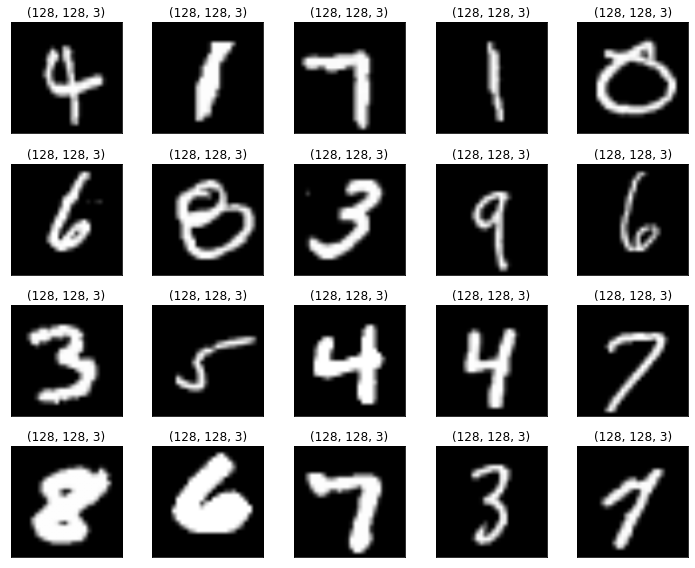

Build Discriminators...
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 64, 64, 64)        3136      
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 128)       131200    
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 32, 32, 128)       0         
_________________________________________________________________
instance_normalization_41 (I (None, 32, 32, 128)       2         
_________________________________________________________________
conv2d_55 (Conv2D)           (None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



Train Discriminators...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train Generators...
Discriminator loss: 10.616991996765137
Generator loss: 225.81906127929688
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 0 | Batch 1 ***************************
Generate images...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresi

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
****************** Epoch 9 | Batch 6665 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 1857.580078125
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 9 | Batch 6666 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 1847.8643798828125
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 9 | Batch 6667 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 1851.8377685546875
---------------------------------------------------------
------------------------

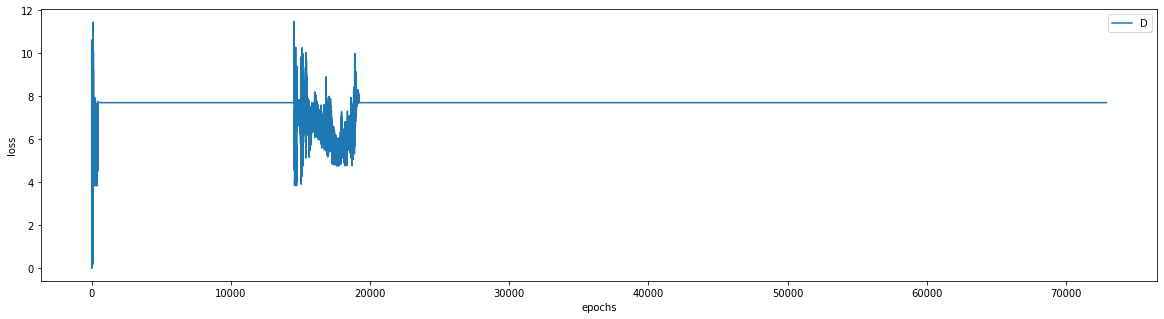

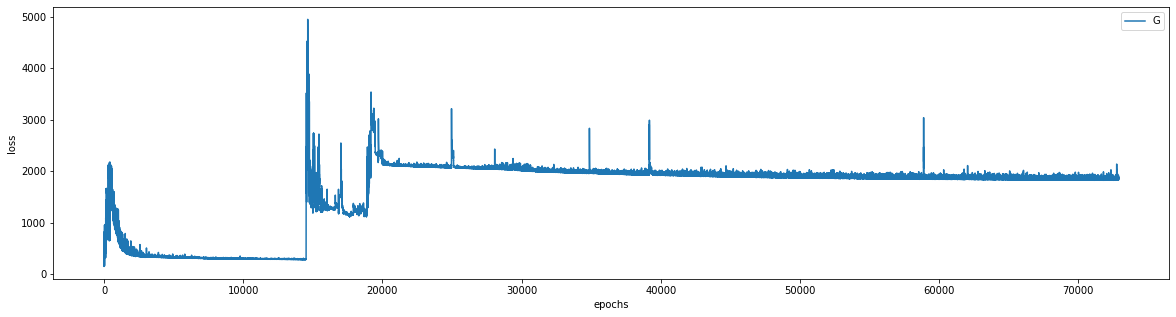

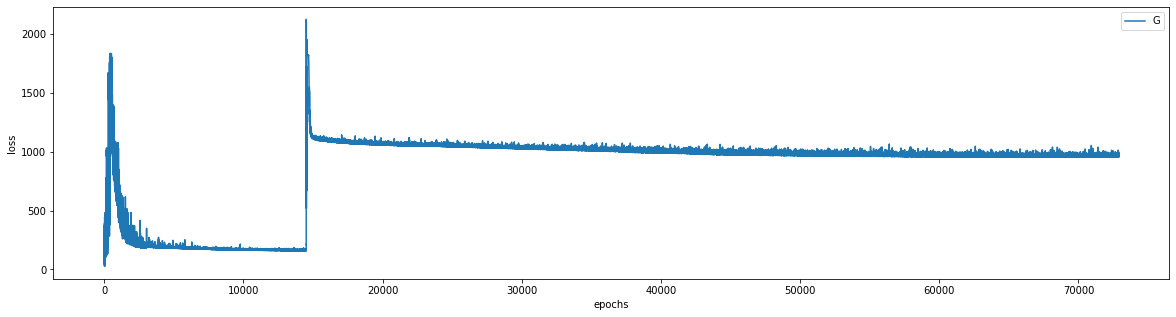

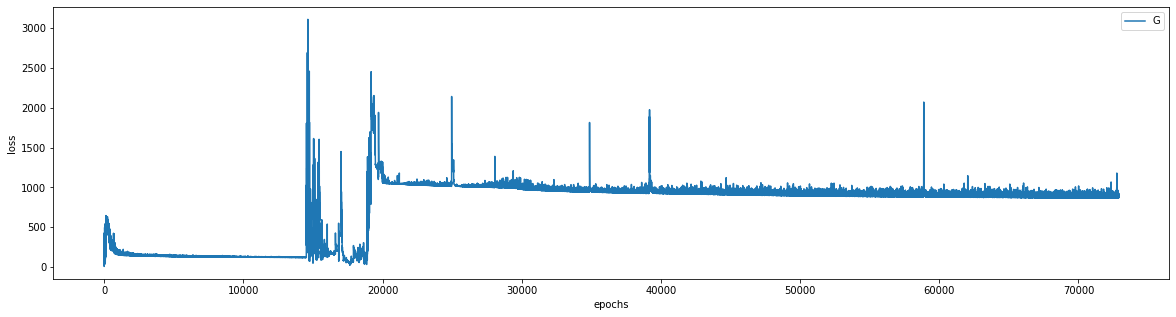

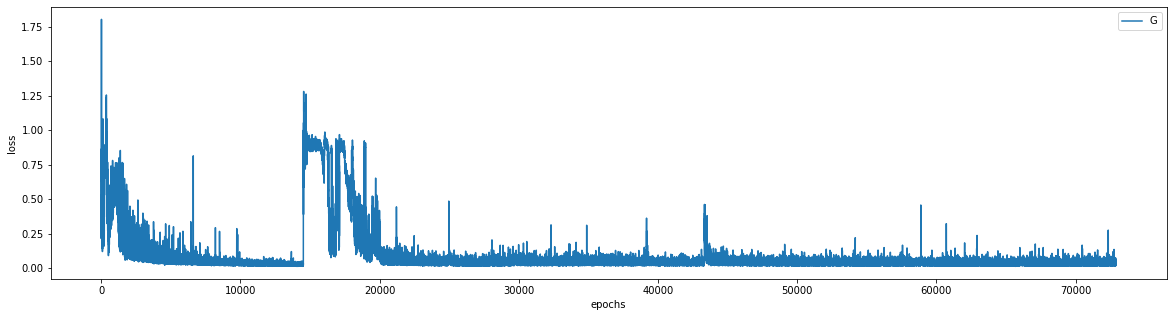

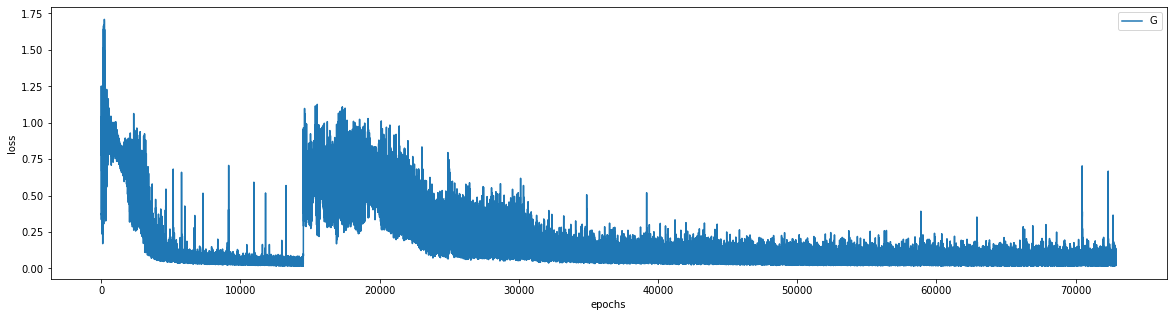

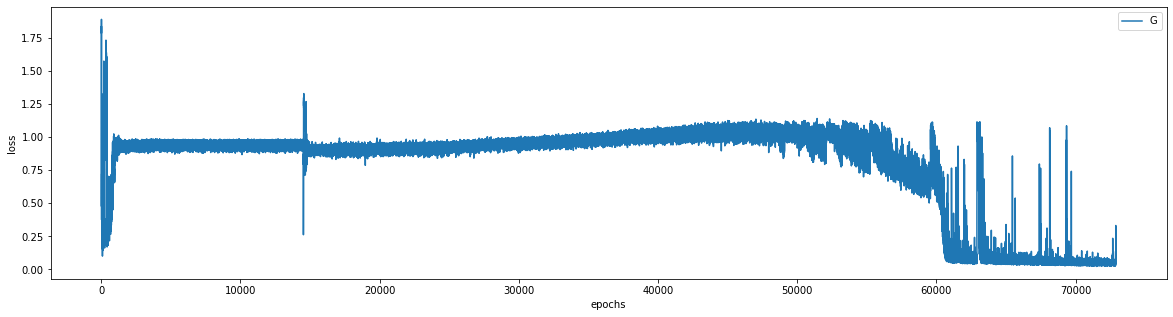

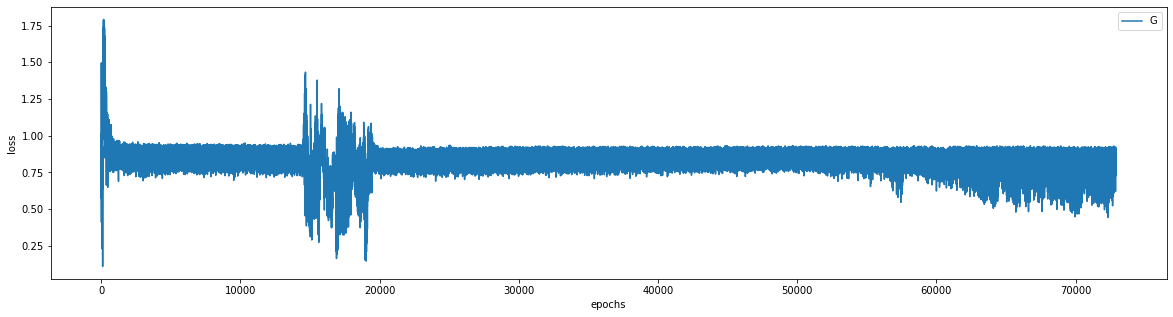

 
TRAINING TERMINE !!
Temps d execution : 16887.07413840294 secondes ---


In [0]:
%cd /content/

import numpy as np
from glob import glob

image_helper = ImageHelper()

print("Ploting the images...")
filenames = np.array(glob('MNIST_to_USPS/testA/*.png'))
image_helper.plot20(filenames)


cycle_lambda = 10
generative_advarsial_network = CycleGAN((128, 128, 3), cycle_lambda, image_helper) 

# GPU
#generative_advarsial_network = generative_advarsial_network.to("cuda")
# il y a une erreur : AttributeError: 'CycleGAN' object has no attribute '_modules'

import time

# Debut du decompte du temps
start_time = time.time()

# Training
generative_advarsial_network.train(epoque, batch_size, "MNIST_to_USPS") # 3643 batchs par epoque avec un batch size = 2

# Affichage du temps d execution
print("Temps d execution : %s secondes ---" % (time.time() - start_time))
# Temps d execution : 16184.28904914856 secondes par epoque avec batch size = 2

/content
Ploting the images...


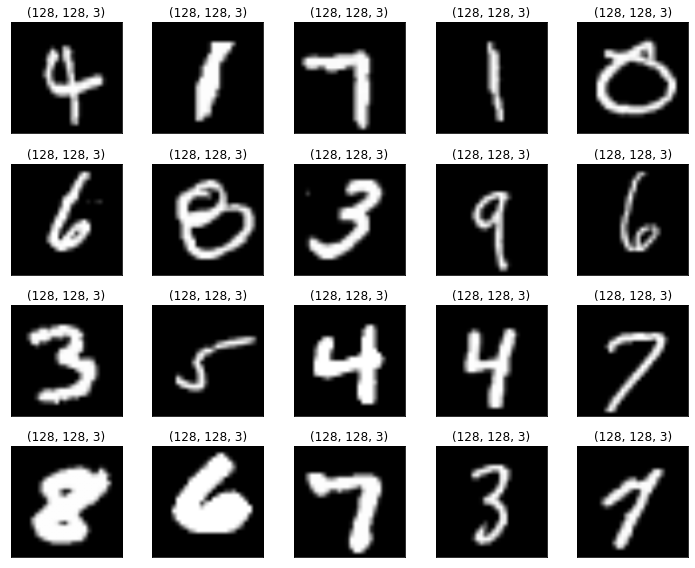

Build Discriminators...
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 64, 64, 64)        3136      
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 128)       131200    
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 32, 32, 128)       0         
_________________________________________________________________
instance_normalization_41 (I (None, 32, 32, 128)       2         
_________________________________________________________________
conv2d_55 (Conv2D)           (None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Train Discriminators...


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train Generators...
Discriminator loss: 11.502875328063965
Generator loss: 58.005035400390625
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 0 | Batch 1 ***************************
Generate images...
Train Discriminators...
Train Generators...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresi

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
****************** Epoch 9 | Batch 6665 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 1964.5684814453125
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 9 | Batch 6666 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 1946.8798828125
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 9 | Batch 6667 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 1945.97412109375
---------------------------------------------------------
-------------------------

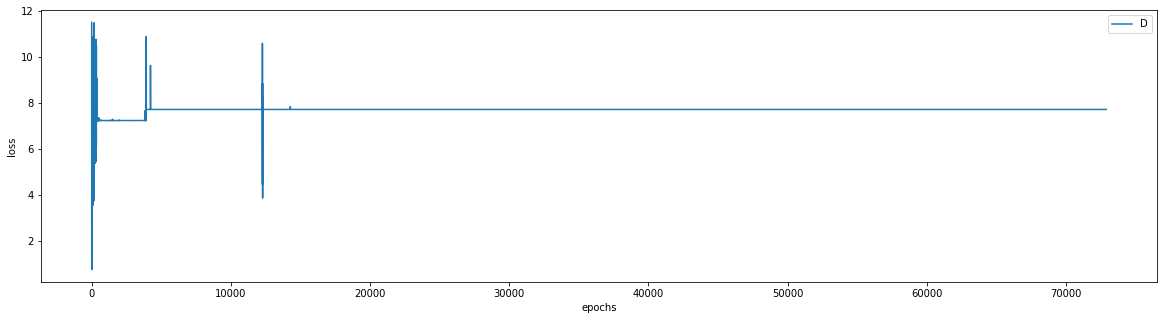

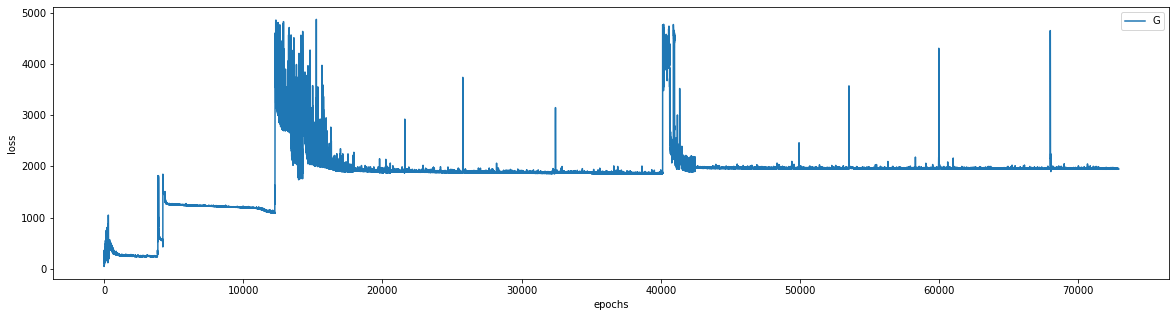

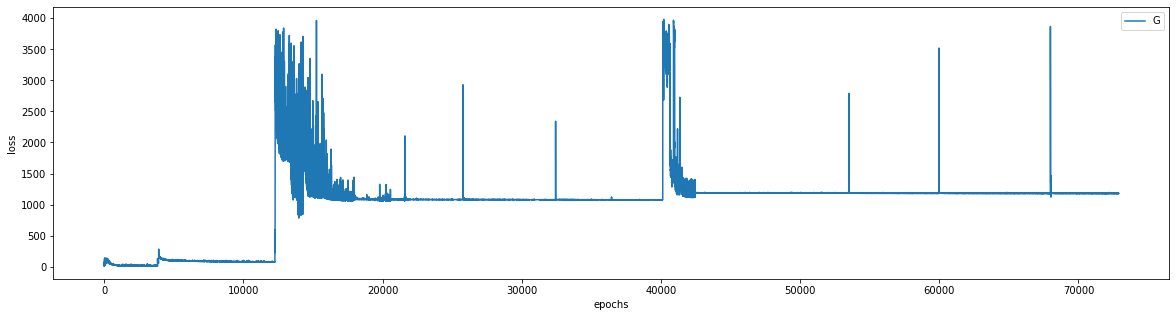

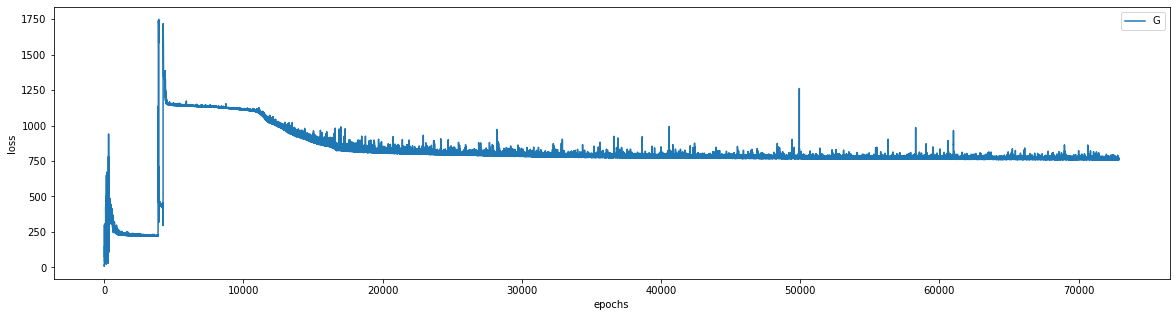

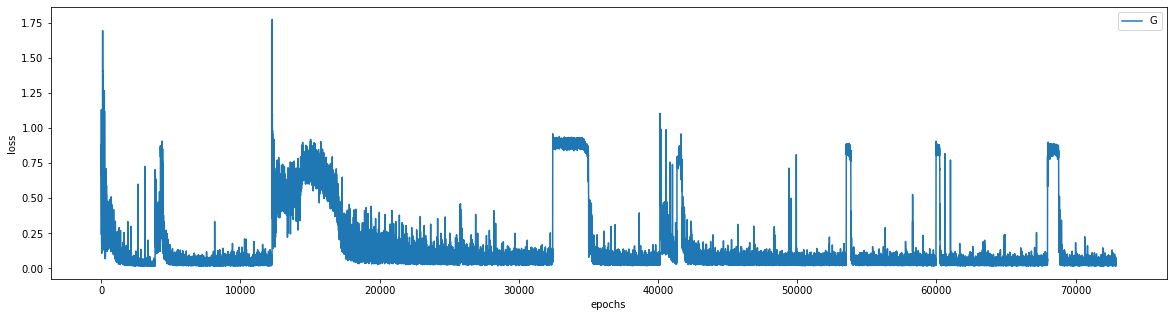

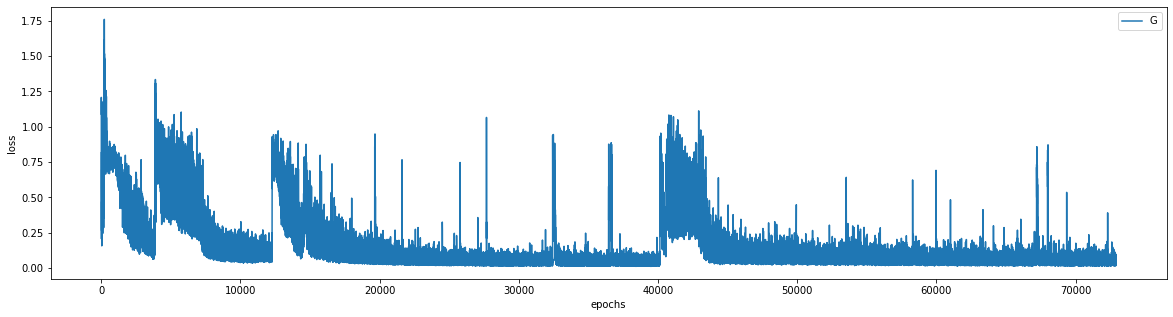

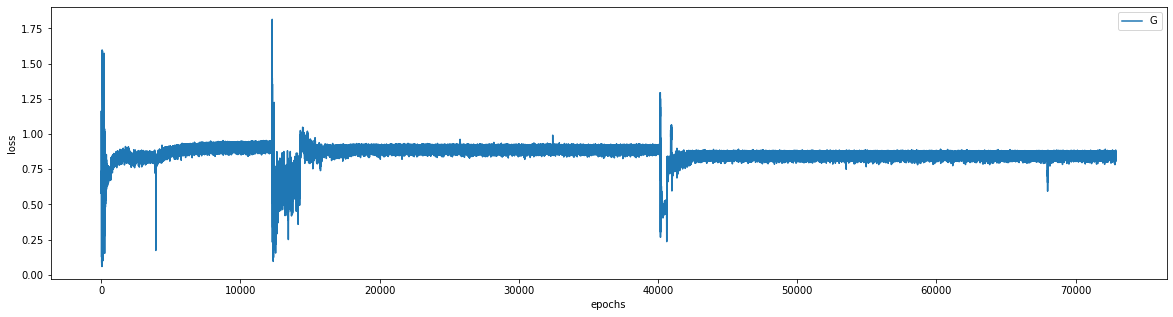

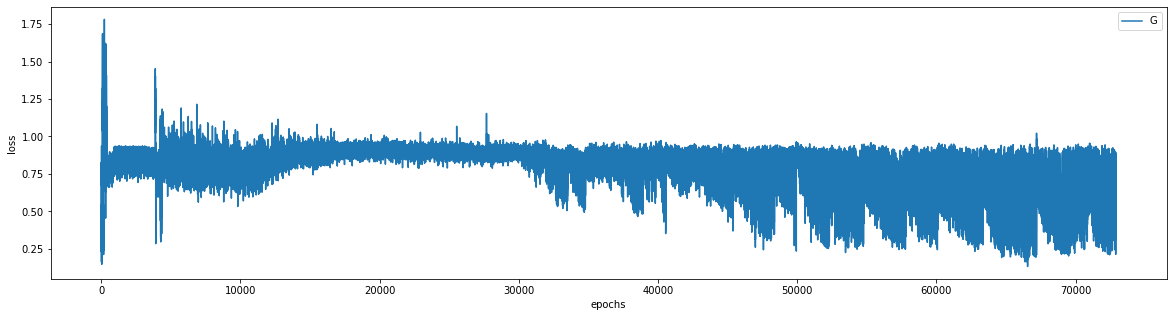

 
TRAINING TERMINE !!
Temps d execution : 11005.671484470367 secondes ---


In [0]:
### Avec des tenseurs (128,128,3)

%cd /content/

import numpy as np
from glob import glob

image_helper = ImageHelper()

print("Ploting the images...")
filenames = np.array(glob('/content/BDD_tensor/testA/*.png'))
image_helper.plot20(filenames)

cycle_lambda = 10
generative_advarsial_network = CycleGAN((128, 128, 3), cycle_lambda, image_helper) 

# GPU
#generative_advarsial_network = generative_advarsial_network.to("cuda")
# il y a une erreur : AttributeError: 'CycleGAN' object has no attribute '_modules'

import time

# Debut du decompte du temps
start_time = time.time()

# Training
generative_advarsial_network.train(epoque, batch_size, "BDD_tensor") 

# Affichage du temps d execution
print("Temps d execution : %s secondes ---" % (time.time() - start_time))


## B - Results

In [0]:
# choix de l'image à afficher
# num_batch doit être un multiple de 100

num_epoque = 0
num_batch = 400 

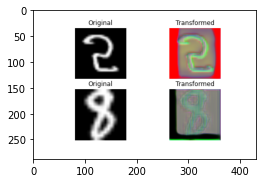

In [0]:
# chemin de l'image à afficher
path_result = 'cycle_gan_images/' + str(num_epoque) + '_' + str(num_batch) + '.png'

#Visualization
import imageio
import numpy
from matplotlib.pyplot import *

img = imread(path_result)

figure(figsize=(4,4))
imshow(img)

In [0]:
# choix de l'image à afficher
# num_batch doit être un multiple de 100

num_epoque = 9
num_batch = 7000 

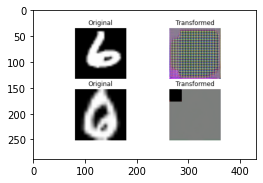

In [0]:
# chemin de l'image à afficher
path_result = 'cycle_gan_images/' + str(num_epoque) + '_' + str(num_batch) + '.png'

#Visualization
import imageio
import numpy
from matplotlib.pyplot import *

img = imread(path_result)

figure(figsize=(4,4))
imshow(img)

# VII - Tests avec d'autres paramètres

## cycle_lambda = 0

In [48]:
# Paramètres 

epoque = 5
batch_size = 1

print('Nbre epoque :', epoque)
print('Batch_size :', batch_size)

Nbre epoque : 5
Batch_size : 1


/content
Ploting the images...


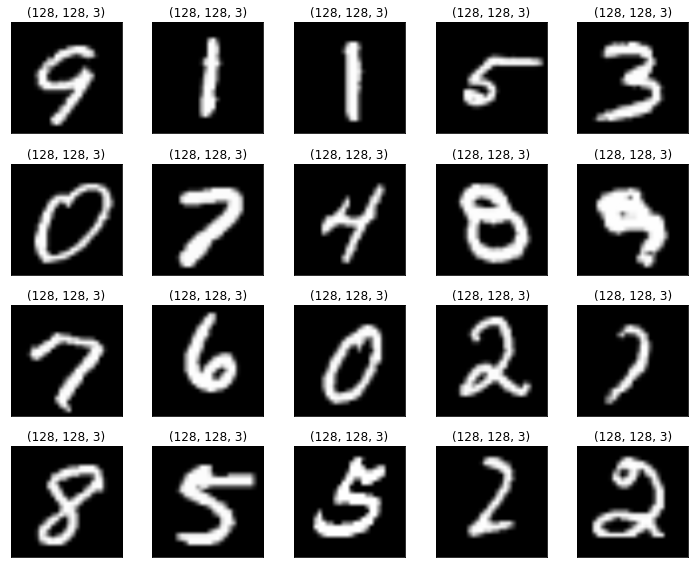

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Build Discriminators...
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        3136      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       131200    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
instance_normalization_1 (In (None, 32, 32, 128)       2         
____________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


---------------------------------------------------------
****************** Epoch 0 | Batch 0 ***************************
Generate images...

Train Discriminators...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train Generators...
Discriminator loss: 9.778304100036621
Generator loss: 180.87718200683594
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 0 | Batch 1 ***************************
Generate images...
Train Discriminators...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresi

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
****************** Epoch 4 | Batch 6665 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 626.5551147460938
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 4 | Batch 6666 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 626.281982421875
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 4 | Batch 6667 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 626.5723266601562
---------------------------------------------------------
------------------------

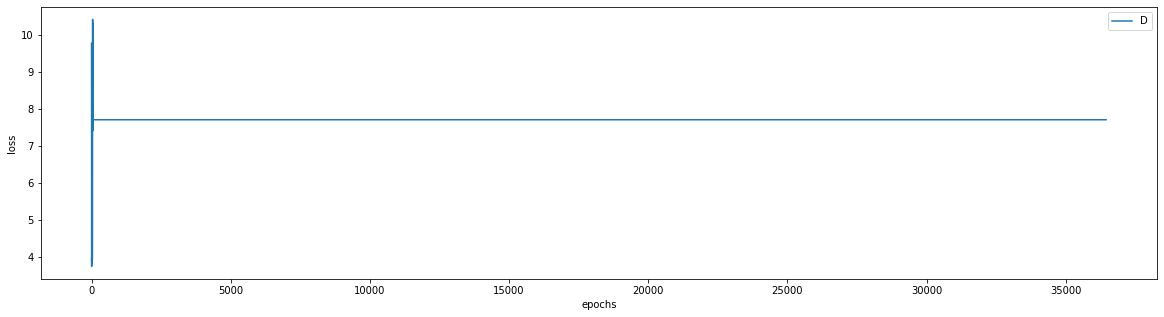

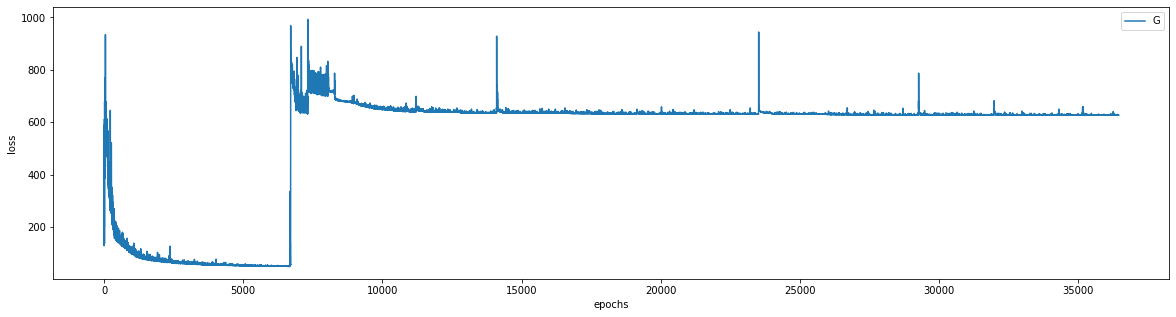

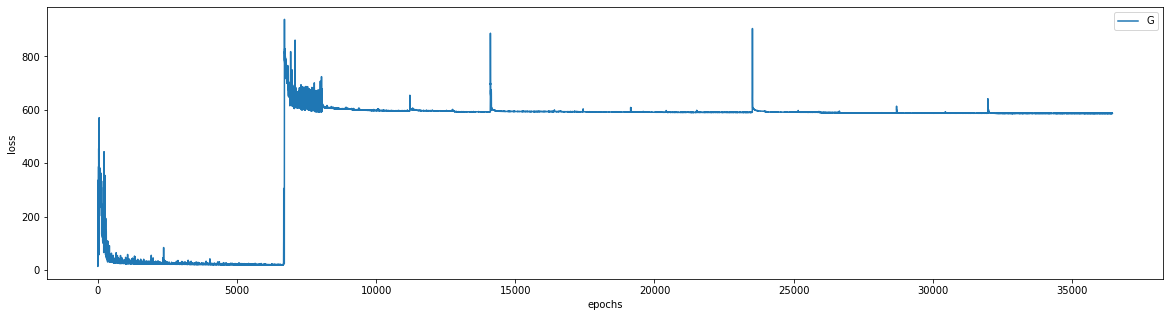

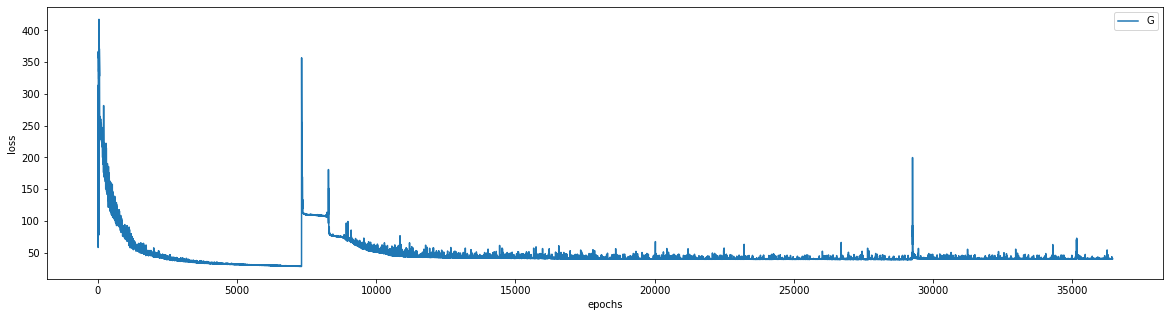

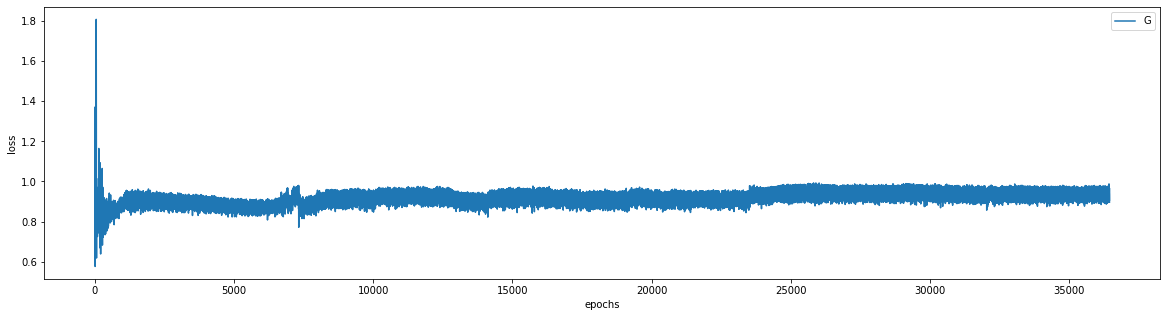

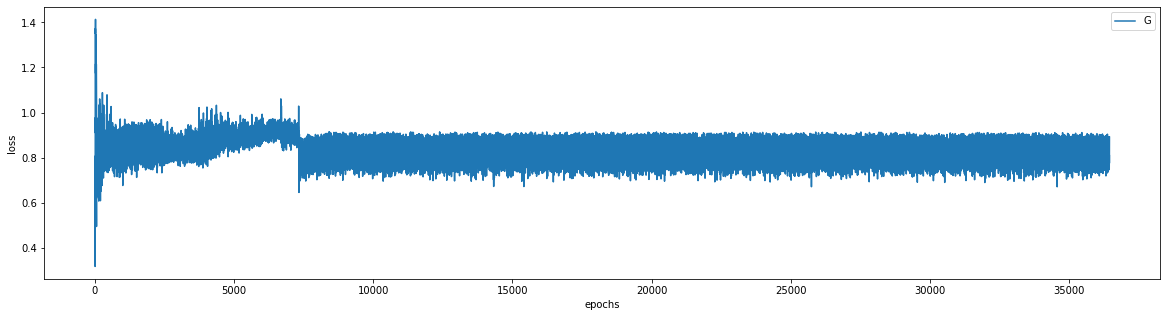

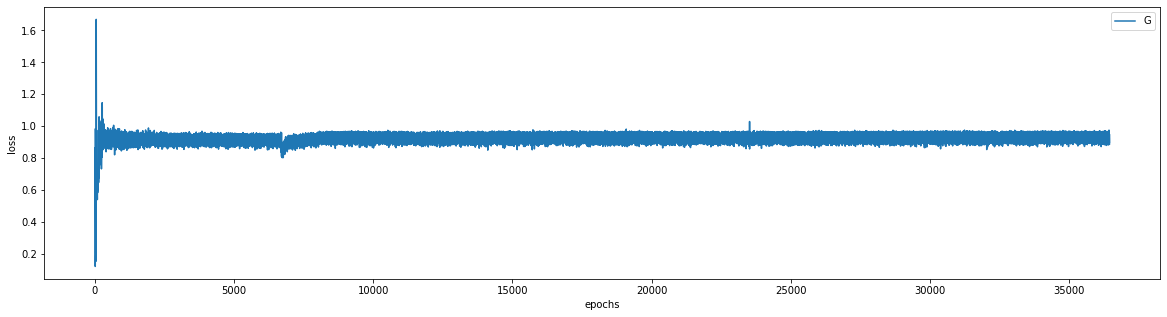

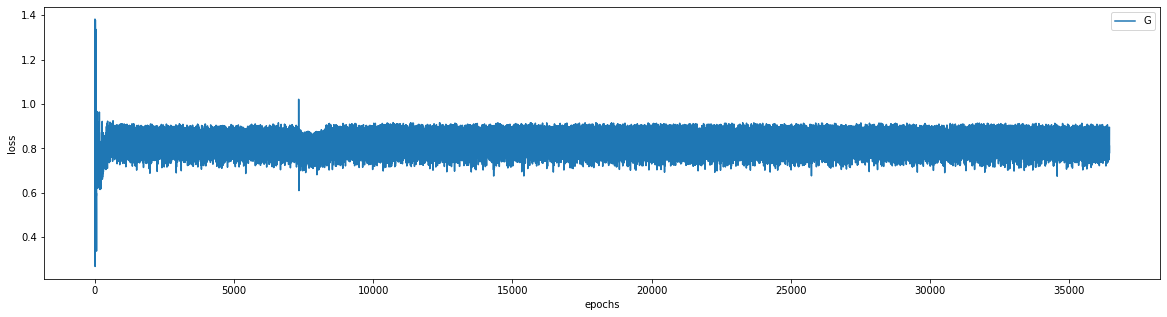

 
TRAINING TERMINE !!
Temps d execution : 8421.449212789536 secondes ---


In [49]:
%cd /content/

import numpy as np
from glob import glob

image_helper = ImageHelper()

print("Ploting the images...")
filenames = np.array(glob('MNIST_to_USPS/testA/*.png'))
image_helper.plot20(filenames)

cycle_lambda = 0
generative_advarsial_network = CycleGAN((128, 128, 3), cycle_lambda, image_helper) 

# GPU
#generative_advarsial_network = generative_advarsial_network.to("cuda")
# il y a une erreur : AttributeError: 'CycleGAN' object has no attribute '_modules'

import time

# Debut du decompte du temps
start_time = time.time()

# Training
generative_advarsial_network.train(epoque, batch_size, "MNIST_to_USPS") # 3643 batchs par epoque avec un batch size = 2

# Affichage du temps d execution
print("Temps d execution : %s secondes ---" % (time.time() - start_time))


/content
Ploting the images...


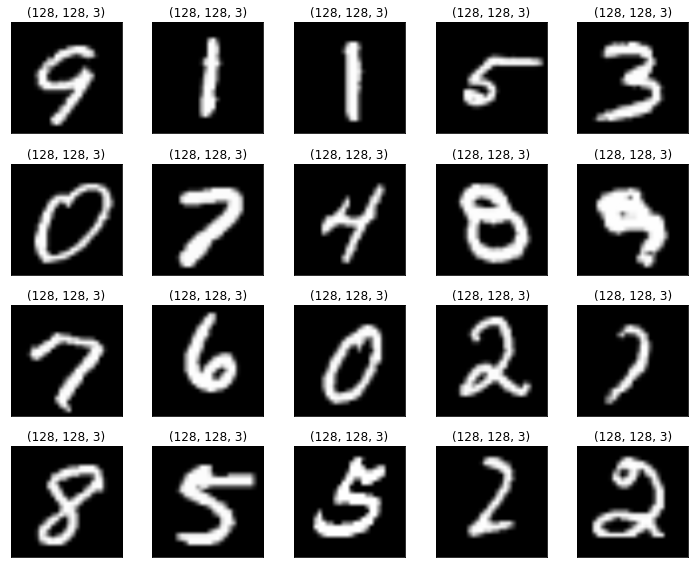

Build Discriminators...
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 64, 64, 64)        3136      
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 128)       131200    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 32, 32, 128)       0         
_________________________________________________________________
instance_normalization_21 (I (None, 32, 32, 128)       2         
_________________________________________________________________
conv2d_29 (Conv2D)           (None,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Train Discriminators...


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train Generators...
Discriminator loss: 12.110269546508789
Generator loss: 149.4994354248047
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 0 | Batch 1 ***************************
Generate images...
Train Discriminators...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresi

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
****************** Epoch 4 | Batch 6665 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 635.3153076171875
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 4 | Batch 6666 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 640.2252807617188
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 4 | Batch 6667 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 640.4075927734375
---------------------------------------------------------
-----------------------

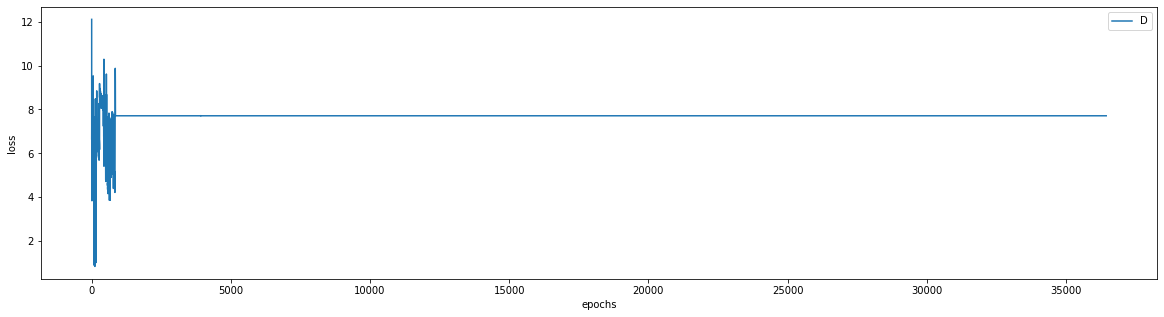

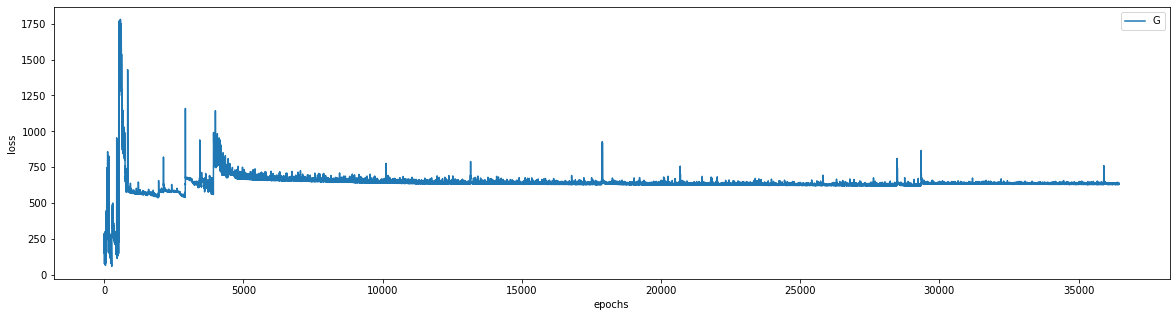

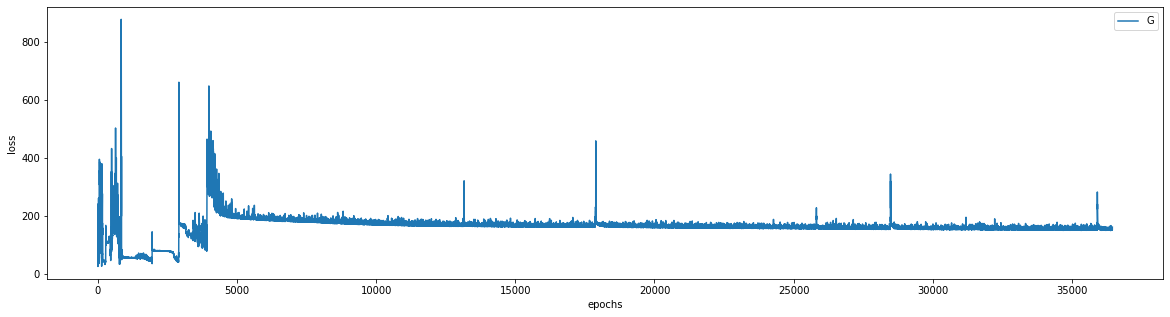

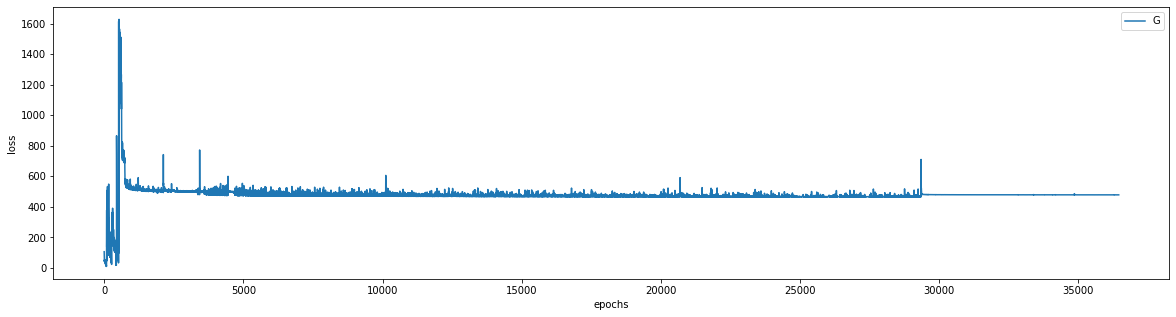

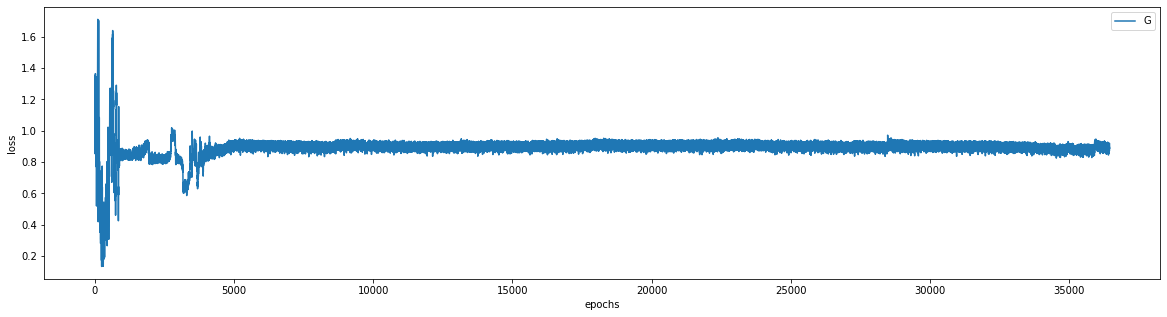

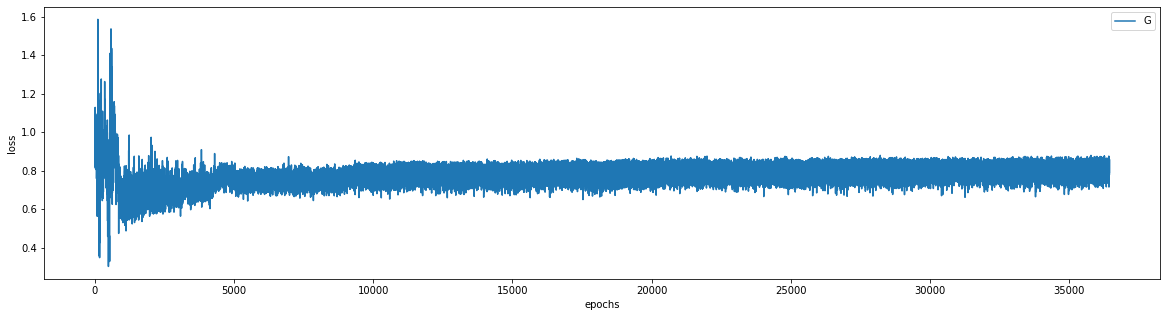

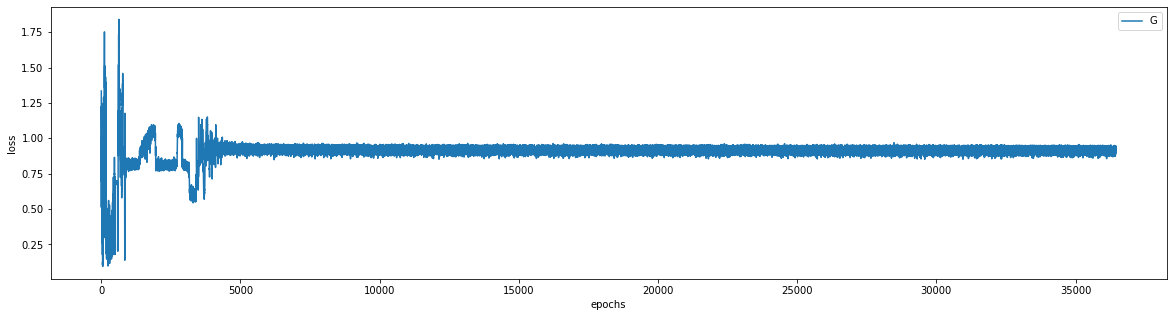

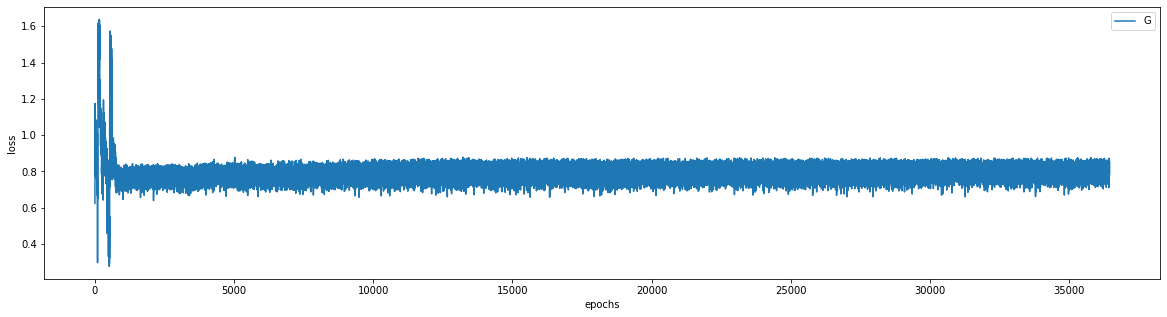

 
TRAINING TERMINE !!
Temps d execution : 8641.66314816475 secondes ---


In [50]:
### Avec des tenseurs (128,128,3)

%cd /content/

import numpy as np
from glob import glob

image_helper = ImageHelper()

print("Ploting the images...")
filenames = np.array(glob('/content/BDD_tensor/testA/*.png'))
image_helper.plot20(filenames)

cycle_lambda = 0
generative_advarsial_network = CycleGAN((128, 128, 3), cycle_lambda, image_helper) 

# GPU
#generative_advarsial_network = generative_advarsial_network.to("cuda")
# il y a une erreur : AttributeError: 'CycleGAN' object has no attribute '_modules'

import time

# Debut du decompte du temps
start_time = time.time()

# Training
generative_advarsial_network.train(epoque, batch_size, "BDD_tensor") 

# Affichage du temps d execution
print("Temps d execution : %s secondes ---" % (time.time() - start_time))


## cycle_lambda = 30

In [46]:
# Paramètres 

epoque = 5
batch_size = 1

print('Nbre epoque :', epoque)
print('Batch_size :', batch_size)

Nbre epoque : 5
Batch_size : 1


/content
Ploting the images...


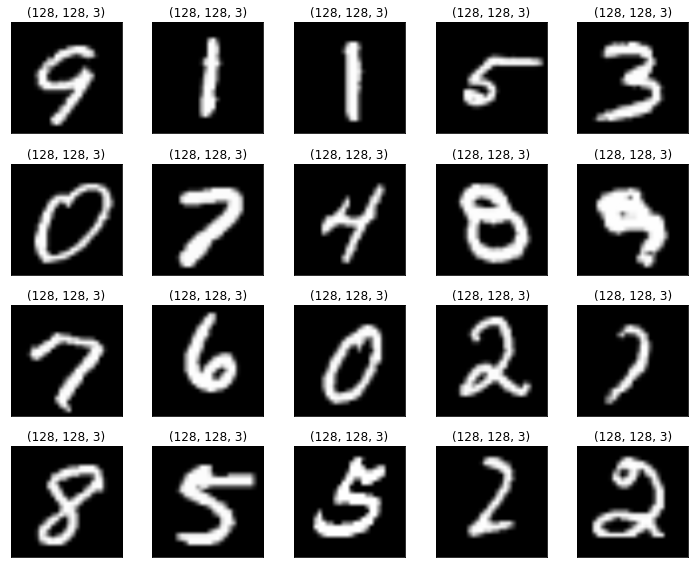

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Build Discriminators...
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        3136      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       131200    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
instance_normalization_1 (In (None, 32, 32, 128)       2         
____________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



Train Discriminators...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train Generators...
Discriminator loss: 10.662487030029297
Generator loss: 165.95278930664062
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 0 | Batch 1 ***************************
Generate images...
Train Discriminators...
Train Generators...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresi

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
****************** Epoch 4 | Batch 6665 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 2343.603759765625
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 4 | Batch 6666 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 2319.408447265625
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 4 | Batch 6667 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 2320.411376953125
---------------------------------------------------------
-----------------------

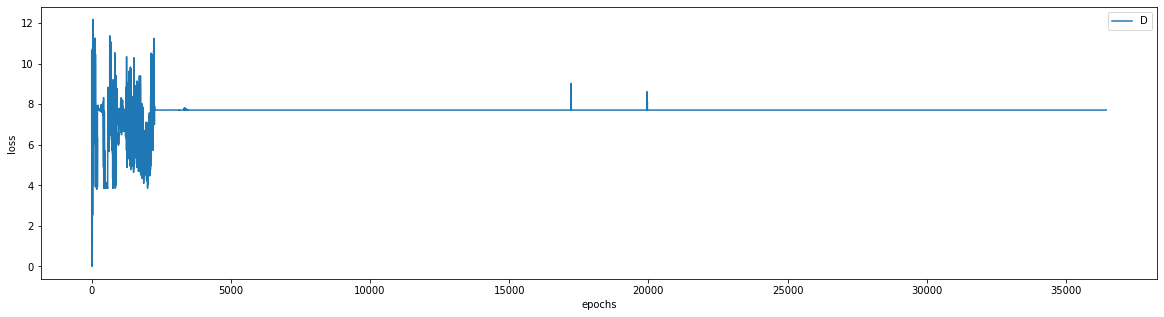

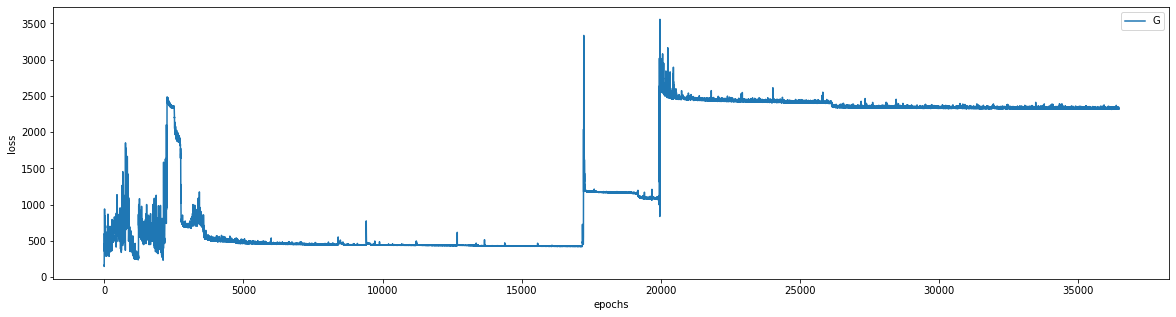

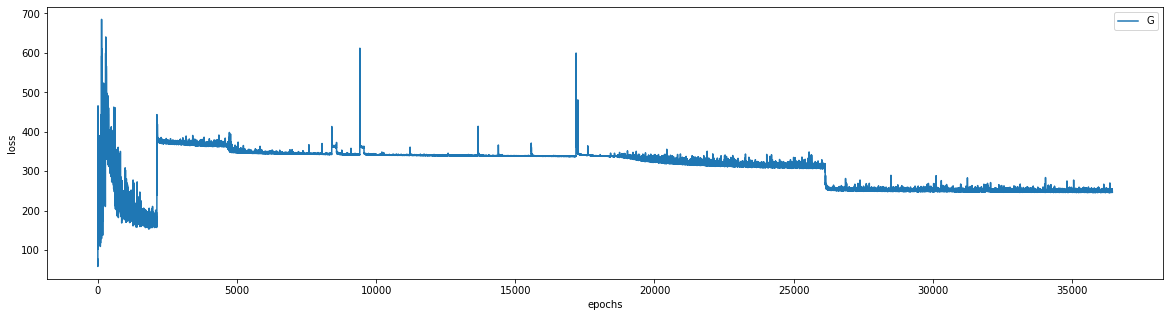

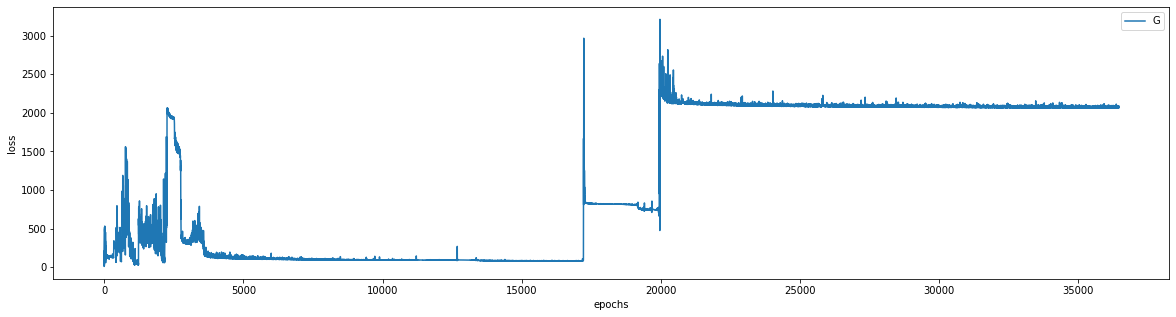

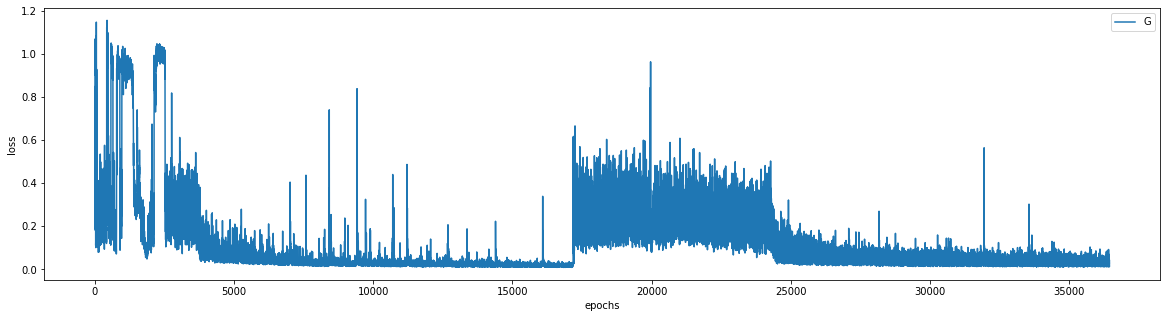

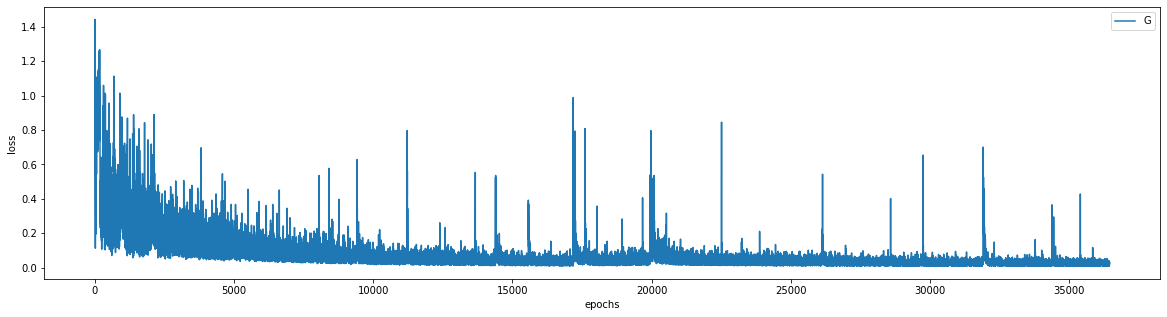

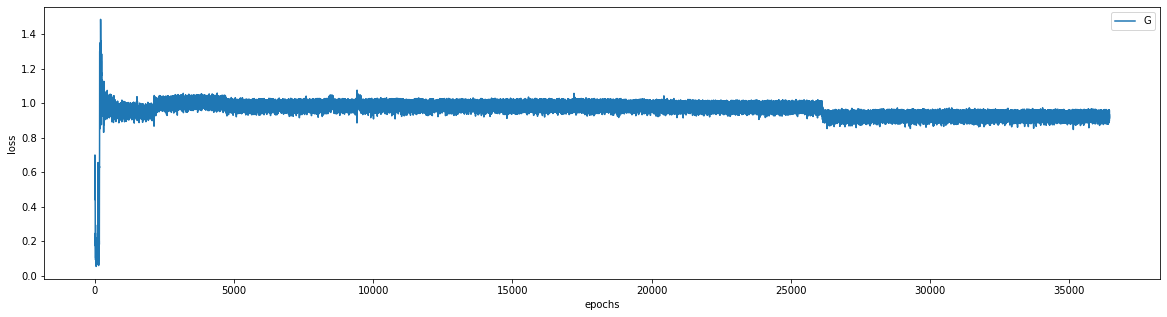

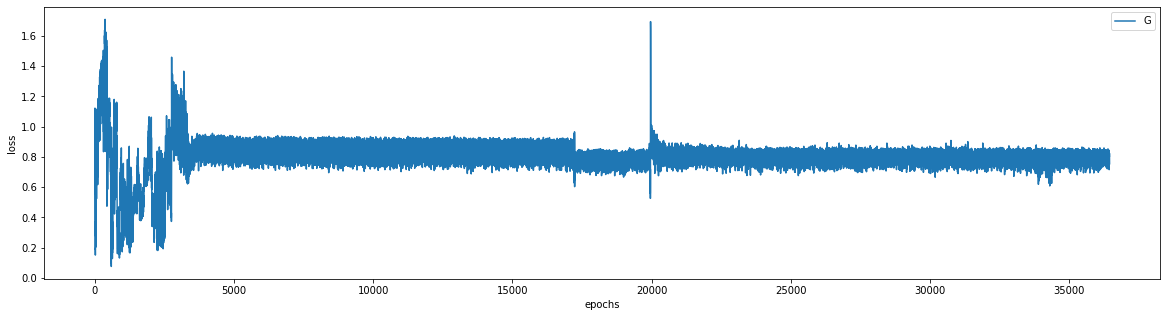

 
TRAINING TERMINE !!
Temps d execution : 5895.577204465866 secondes ---


In [47]:
%cd /content/

import numpy as np
from glob import glob

image_helper = ImageHelper()

print("Ploting the images...")
filenames = np.array(glob('MNIST_to_USPS/testA/*.png'))
image_helper.plot20(filenames)

cycle_lambda = 30
generative_advarsial_network = CycleGAN((128, 128, 3), cycle_lambda, image_helper) 

# GPU
#generative_advarsial_network = generative_advarsial_network.to("cuda")
# il y a une erreur : AttributeError: 'CycleGAN' object has no attribute '_modules'

import time

# Debut du decompte du temps
start_time = time.time()

# Training
generative_advarsial_network.train(epoque, batch_size, "MNIST_to_USPS") # 3643 batchs par epoque avec un batch size = 2

# Affichage du temps d execution
print("Temps d execution : %s secondes ---" % (time.time() - start_time))


/content
Ploting the images...


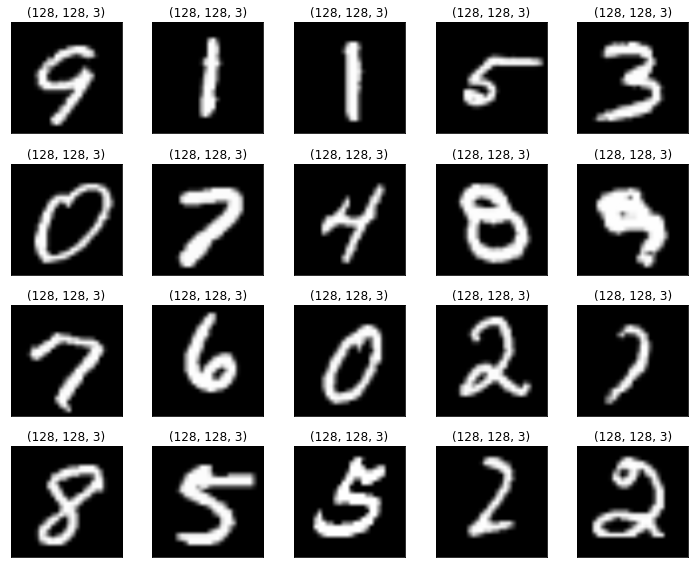

Build Discriminators...
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 64, 64, 64)        3136      
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 128)       131200    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 32, 32, 128)       0         
_________________________________________________________________
instance_normalization_21 (I (None, 32, 32, 128)       2         
_________________________________________________________________
conv2d_29 (Conv2D)           (None,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Train Discriminators...


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train Generators...
Discriminator loss: 11.738998413085938
Generator loss: 125.26242065429688
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 0 | Batch 1 ***************************
Generate images...
Train Discriminators...
Train Generators...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresi

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
****************** Epoch 4 | Batch 6665 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 6031.3505859375
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 4 | Batch 6666 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 9030.279296875
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 4 | Batch 6667 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.712474346160889
Generator loss: 6454.87109375
---------------------------------------------------------
--------------------------------

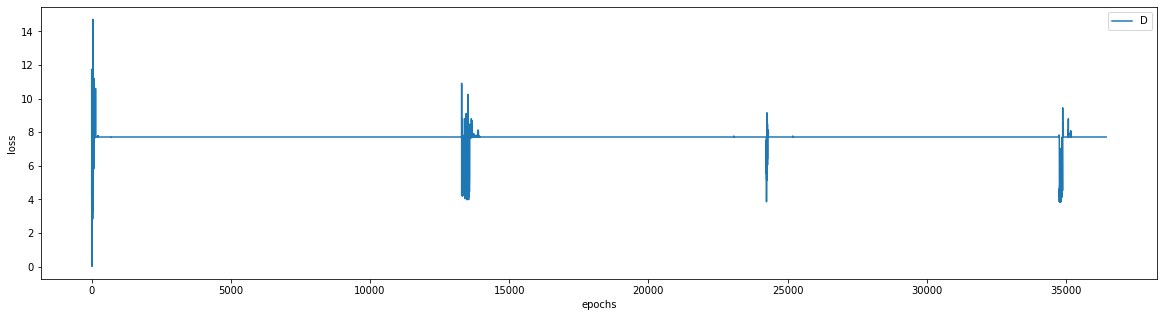

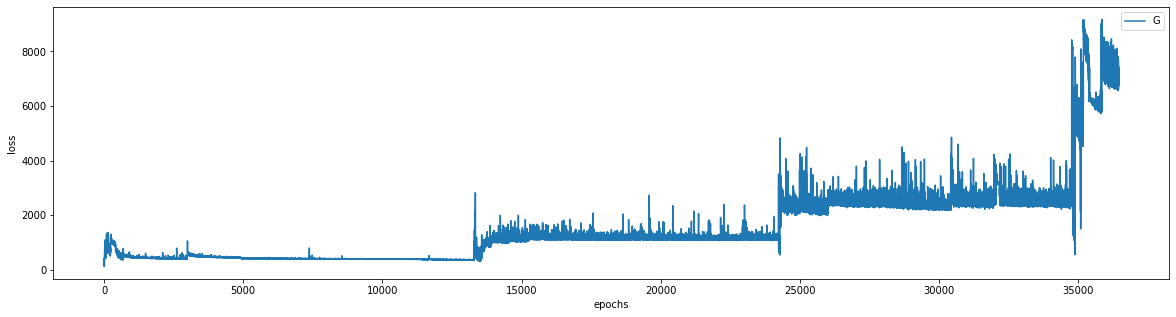

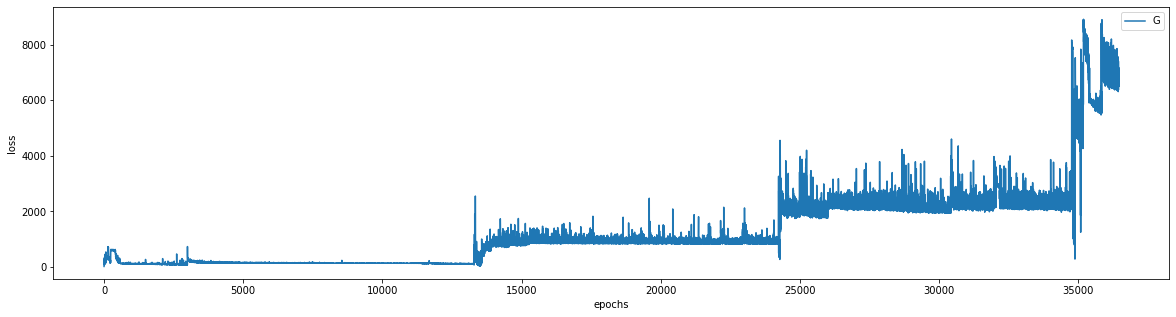

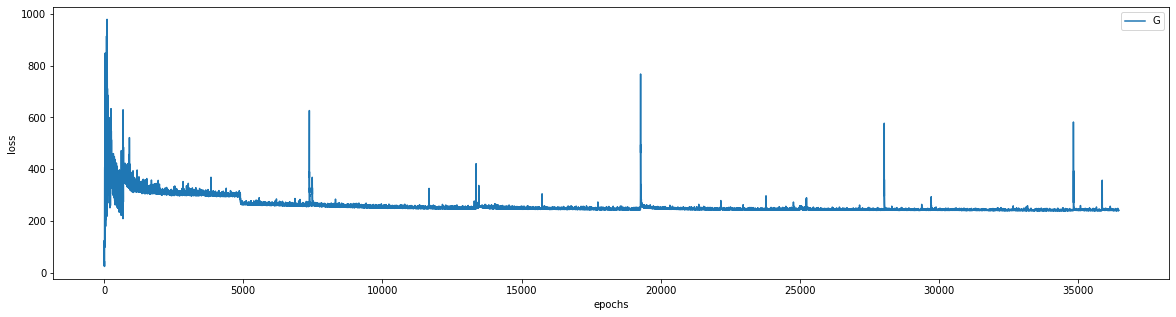

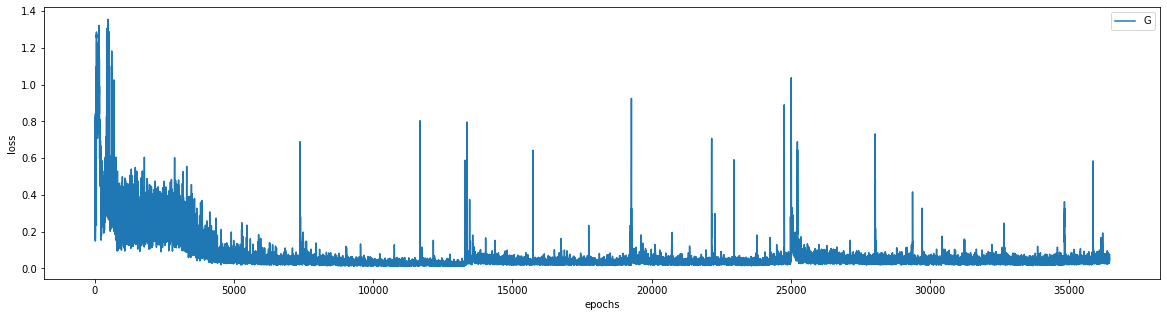

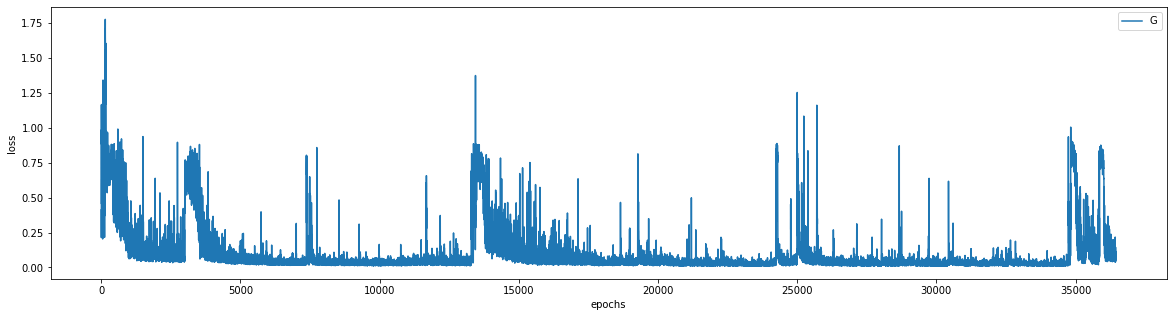

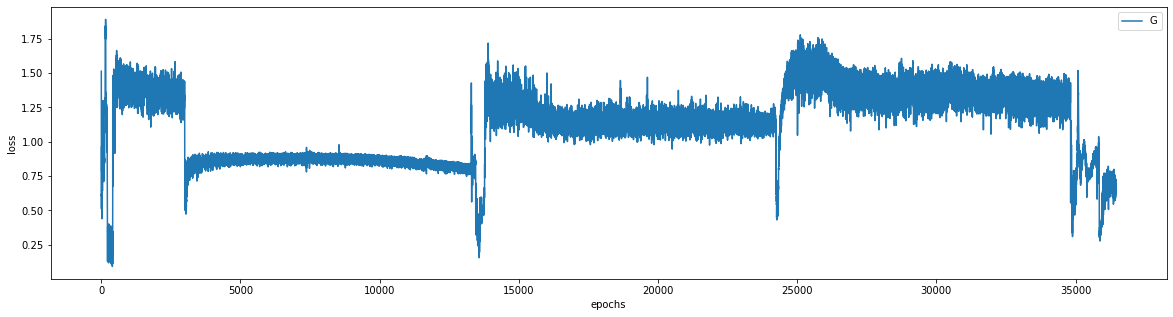

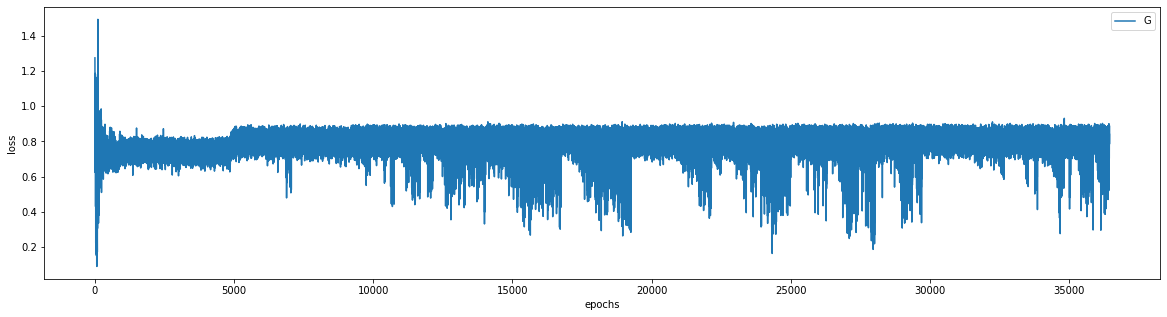

 
TRAINING TERMINE !!
Temps d execution : 6106.123330116272 secondes ---


In [48]:
### Avec des tenseurs (128,128,3)

%cd /content/

import numpy as np
from glob import glob

image_helper = ImageHelper()

print("Ploting the images...")
filenames = np.array(glob('/content/BDD_tensor/testA/*.png'))
image_helper.plot20(filenames)

cycle_lambda = 30
generative_advarsial_network = CycleGAN((128, 128, 3), cycle_lambda, image_helper) 

# GPU
#generative_advarsial_network = generative_advarsial_network.to("cuda")
# il y a une erreur : AttributeError: 'CycleGAN' object has no attribute '_modules'

import time

# Debut du decompte du temps
start_time = time.time()

# Training
generative_advarsial_network.train(epoque, batch_size, "BDD_tensor") 

# Affichage du temps d execution
print("Temps d execution : %s secondes ---" % (time.time() - start_time))


In [0]:
# choix de l'image à afficher
# num_batch doit être un multiple de 100

num_epoque = 0
num_batch = 400 

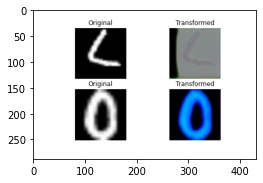

In [50]:
# chemin de l'image à afficher
path_result = 'cycle_gan_images/' + str(num_epoque) + '_' + str(num_batch) + '.png'

#Visualization
import imageio
import numpy
from matplotlib.pyplot import *

img = imread(path_result)

figure(figsize=(4,4))
imshow(img)

In [0]:
# choix de l'image à afficher
# num_batch doit être un multiple de 100

num_epoque = 4
num_batch = 400 

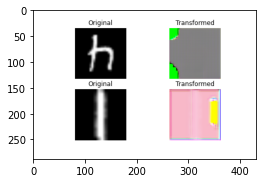

In [52]:
# chemin de l'image à afficher
path_result = 'cycle_gan_images/' + str(num_epoque) + '_' + str(num_batch) + '.png'

#Visualization
import imageio
import numpy
from matplotlib.pyplot import *

img = imread(path_result)

figure(figsize=(4,4))
imshow(img)

## learning_rate = 0.01

In [0]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Keras modules
from keras.layers import Input, LeakyReLU, UpSampling2D, Conv2D, Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.models import Model
from keras.optimizers import Adam

# Torch
import torch
import torch.nn as nn

class CycleGAN(nn.Module):
  #CONSTRUCTOR (here parametrized constructor)
    def __init__(self, image_shape, cycle_lambda, image_hepler):

  #initialization of constructor class fields (cycle_lmabda, _image_helper, optimizer)
        self.optimizer = Adam(0.01, 0.5) # learning_rate = 0.01
        
        self.cycle_lambda = cycle_lambda 
        self.id_lambda = 0.1 * self.cycle_lambda
        self._image_helper = image_hepler
        self.img_shape = image_shape
        
        # Calculate output shape
        patch = int(self.img_shape[0] / 2**4)
        self.disc_patch = (patch, patch, 1)

        print("Build Discriminators...")
        self._discriminatorX = self._build_discriminator_model() #building the first discriminator
        self._compile_discriminator_model(self._discriminatorX) #compilation of the first discriminator
        self._discriminatorY = self._build_discriminator_model() #building the second discriminator
        self._compile_discriminator_model(self._discriminatorY) #compilation of the second discriminator
        
        print("Build Generators...") #creation of the two generators
        self._generatorXY = self._build_generator_model() 
        self._generatorYX = self._build_generator_model()        
        
        print("Build GAN...")
        self._build_and_compile_gan()

    #Only method that is mentionned as "public" (even if no such classes don't exist in Python)
    #It is mentionned with the absence of "_" at the beginning, as compared to other methods.
    #Model used with the image helper

    def train(self, epochs, batch_size, train_data_path):
        print("TRAINING ...")
        
        #Real/fake variables used during training 
        real = np.ones((batch_size,) + self.disc_patch)
        fake = np.zeros((batch_size,) + self.disc_patch)
        
        history_D = []

        history_G0 = []
        history_G1 = []
        history_G2 = []
        history_G3 = []
        history_G4 = []
        history_G5 = []
        history_G6 = []
        

        #Repetition of the following procedure over the whole number of epochs
        for epoch in range(epochs):
          
          #1. Reading of a batch of images from the training folder
            for i, (imagesX, imagesY) in enumerate(self._image_helper.load_batch_of_train_images(train_data_path, batch_size)):
                print ("---------------------------------------------------------")
                print ("****************** Epoch {} | Batch {} ***************************".format(epoch, i))
          
          #2. Pushing to the generator and reading the translated images 
                print("Generate images...")
                fakeY = self._generatorXY.predict(imagesX)
                fakeX = self._generatorYX.predict(imagesY)

          #3. Discriminators training 
                print("Train Discriminators...")
                discriminatorX_loss_real = self._discriminatorX.train_on_batch(imagesX, real)
                discriminatorX_loss_fake = self._discriminatorX.train_on_batch(fakeX, fake)
                discriminatorX_loss = 0.5 * np.add(discriminatorX_loss_real, discriminatorX_loss_fake)

                discriminatorY_loss_real = self._discriminatorY.train_on_batch(imagesY, real)
                discriminatorY_loss_fake = self._discriminatorY.train_on_batch(fakeY, fake)
                discriminatorY_loss = 0.5 * np.add(discriminatorY_loss_real, discriminatorY_loss_fake)

                mean_discriminator_loss = 0.5 * np.add(discriminatorX_loss, discriminatorY_loss)

            #4. Generators training    
                print("Train Generators...")
                generator_loss = self.gan.train_on_batch([imagesX, imagesY],
                                                        [real, real,
                                                        imagesX, imagesY,
                                                        imagesX, imagesY])

                print ("Discriminator loss: {}".format(mean_discriminator_loss[0]))
                print ("Generator loss: {}".format(generator_loss[0]))
                print ("---------------------------------------------------------")
                
                history_D.append({"D":mean_discriminator_loss[0]})

                history_G0.append({"G":generator_loss[0]})
                history_G1.append({"G":generator_loss[1]})
                history_G2.append({"G":generator_loss[2]})
                history_G3.append({"G":generator_loss[3]})
                history_G4.append({"G":generator_loss[4]})
                history_G5.append({"G":generator_loss[5]})
                history_G6.append({"G":generator_loss[6]})

                
                if i%100 ==0:
                    self._save_images("{}_{}".format(epoch, i), train_data_path)

        self._plot_loss(history_D)
        self._plot_loss(history_G0)
        self._plot_loss(history_G1)
        self._plot_loss(history_G2)
        self._plot_loss(history_G3)
        self._plot_loss(history_G4)
        self._plot_loss(history_G5)
        self._plot_loss(history_G6)
        #print(history)
        print(' ')
        print('TRAINING TERMINE !!')


 #DESCRIPTION OF HELPER METHODS 

  #Generator:  created using (i) encoding part ; (ii) transformer part ; (iii) decoder part 
  # - Encoding layers: for down-sampling
  # - Transformation layers : for applying styles
  # - Upsampling/decoding layers       

  #Encoding layers are built using convolutional layers
    def _encode__layer(self, input_layer, filters):
        layer = Conv2D(filters, kernel_size=4, strides=2, padding='same')(input_layer)
        layer = LeakyReLU(alpha=0.2)(layer)
        layer = InstanceNormalization()(layer)
        return layer

   #Transformational and decoding layers are created using upsampling layers.      
    def _decode_transform_layer(self, input_layer, forward_layer, filters):
        layer = UpSampling2D(size=2)(input_layer)
        layer = Conv2D(filters, kernel_size=4, strides=1, padding='same', activation='relu')(layer)
        layer = InstanceNormalization()(layer)
        layer = Concatenate()([layer, forward_layer])
        return layer

  #Connection of all methods : encoder, transformator and decoder
    def _build_generator_model(self):
        generator_input = Input(shape=self.img_shape)
        
        print("Build Encoder...")
        encode_layer_1 = self._encode__layer(generator_input, 32);
        encode_layer_2 = self._encode__layer(encode_layer_1, 64);
        encode_layer_3 = self._encode__layer(encode_layer_2, 128);
        encode_layer_4 = self._encode__layer(encode_layer_3, 256);
        
        print("Build Transformer - Decoder...")
        decode_transform_layer1 = self._decode_transform_layer(encode_layer_4, encode_layer_3, 128);
        decode_transform_layer2 = self._decode_transform_layer(decode_transform_layer1, encode_layer_2, 64);
        decode_transform_layer3 = self._decode_transform_layer(decode_transform_layer2, encode_layer_1, 32);
        
        generator_model = UpSampling2D(size = 2)(decode_transform_layer3)
        generator_model = Conv2D(self.img_shape[2], kernel_size=4, strides=1, padding='same', activation='tanh')(generator_model)
        
        final_generator_model = Model(generator_input, generator_model)
        final_generator_model.summary()
        return final_generator_model
        
    def _build_discriminator_model(self):
        discriminator_input = Input(shape=self.img_shape)
        discriminator_model = Conv2D(64, kernel_size=4, strides=2, padding='same')(discriminator_input)
        discriminator_model = LeakyReLU(alpha=0.2)(discriminator_model)
        discriminator_model = Conv2D(128, kernel_size=4, strides=2, padding='same')(discriminator_model)
        discriminator_model = LeakyReLU(alpha=0.2)(discriminator_model)
        discriminator_model = InstanceNormalization()(discriminator_model)
        discriminator_model = Conv2D(256, kernel_size=4, strides=2, padding='same')(discriminator_model)
        discriminator_model = LeakyReLU(alpha=0.2)(discriminator_model)
        discriminator_model = InstanceNormalization()(discriminator_model)
        discriminator_model = Conv2D(512, kernel_size=4, strides=2, padding='same')(discriminator_model)
        discriminator_model = LeakyReLU(alpha=0.2)(discriminator_model)
        discriminator_model = InstanceNormalization()(discriminator_model)        
        discriminator_model = Conv2D(1, kernel_size=4, strides=1, padding='same')(discriminator_model)
        
        return Model(discriminator_input, discriminator_model)
        
        #Rem : the discriminator is here a standard Convolutonal Neural Network. Detection if the image is coming from the desired domain

    def _compile_discriminator_model(self, model):
        model.compile(loss='binary_crossentropy',
            optimizer=self.optimizer,
            metrics=['accuracy'])
        model.summary()
    
    def _build_and_compile_gan(self):
        
        imageX = Input(shape=self.img_shape)
        imageY = Input(shape=self.img_shape)

        fakeY = self._generatorXY(imageX)
        fakeX = self._generatorYX(imageY)

        reconstructedX = self._generatorYX(fakeY)
        reconstructedY = self._generatorXY(fakeX)
        
        imageX_id = self._generatorYX(imageX)
        imageY_id = self._generatorXY(imageY)
        
        self._discriminatorX.trainable = False
        self._discriminatorY.trainable = False
        
        validX = self._discriminatorX(fakeX)
        validY = self._discriminatorY(fakeY)
        
        self.gan = Model(inputs=[imageX, imageY],
                          outputs=[ validX, validY,
                                    reconstructedX, reconstructedY,
                                    imageX_id, imageY_id ])
        self.gan.compile(loss=['mse', 'mse',
                                'mae', 'mae',
                                'mae', 'mae'],
                        loss_weights=[  1, 1,
                                        self.cycle_lambda, self.cycle_lambda,
                                        self.id_lambda, self.id_lambda ],
                        optimizer=self.optimizer)
        
        self.gan.summary()
    
    def _save_images(self, epoch, path):
        (img_X, img_Y) = self._image_helper.load_testing_image(path)
        
        fake_Y = self._generatorXY.predict(img_X)
        fake_X = self._generatorYX.predict(img_Y)

        plot_images = np.concatenate([img_X, fake_Y, img_Y, fake_X])

        # Rescale
        plot_images = 0.5 * plot_images + 0.5
        self._image_helper.save_image(plot_images, epoch)

        
    def _plot_loss(self, history):
        hist = pd.DataFrame(history)
        plt.figure(figsize=(20,5))
        for colnm in hist.columns:
            plt.plot(hist[colnm],label=colnm)
        plt.legend()
        plt.ylabel("loss")
        plt.xlabel("epochs")
        plt.show()

In [54]:
# Paramètres 

epoque = 5
batch_size = 1

print('Nbre epoque :', epoque)
print('Batch_size :', batch_size)

Nbre epoque : 5
Batch_size : 1


/content
Ploting the images...


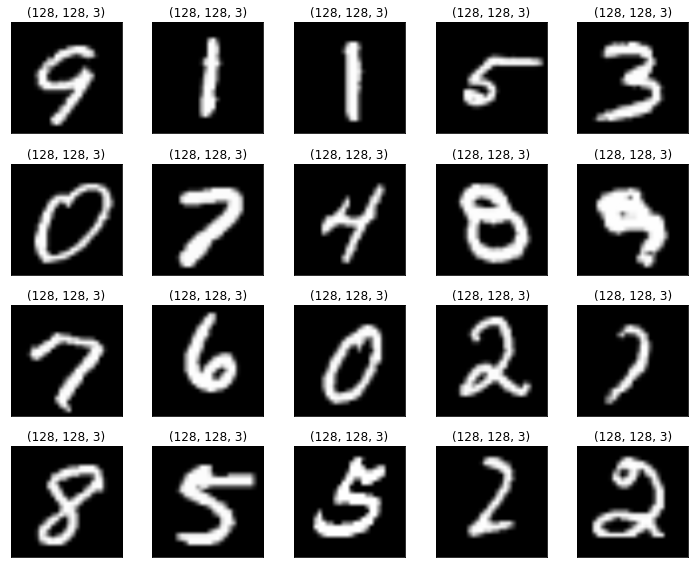

Build Discriminators...
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 64, 64, 64)        3136      
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 128)       131200    
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 32, 32, 128)       0         
_________________________________________________________________
instance_normalization_41 (I (None, 32, 32, 128)       2         
_________________________________________________________________
conv2d_55 (Conv2D)           (None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Train Discriminators...


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train Generators...
Discriminator loss: 8.075418472290039
Generator loss: 758.1226196289062
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 0 | Batch 1 ***************************
Generate images...
Train Discriminators...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresi

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
****************** Epoch 4 | Batch 6665 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.689546585083008
Generator loss: 2381184.75
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 4 | Batch 6666 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.689546585083008
Generator loss: 2381184.0
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 4 | Batch 6667 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.689546585083008
Generator loss: 2381184.0
---------------------------------------------------------
----------------------------------------------

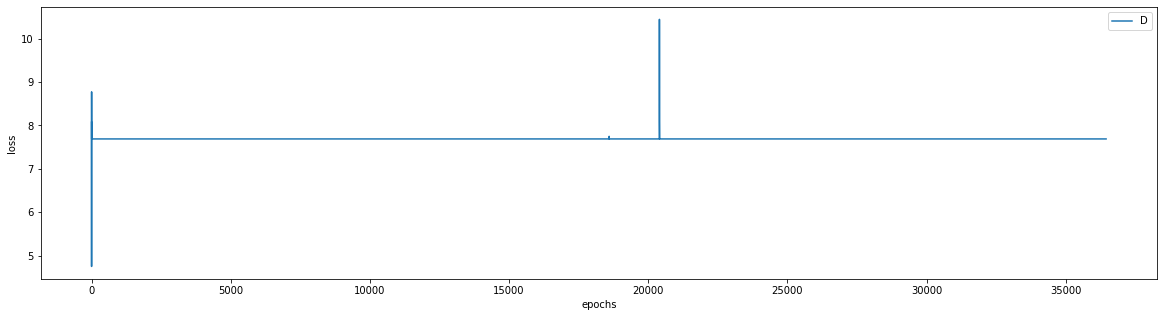

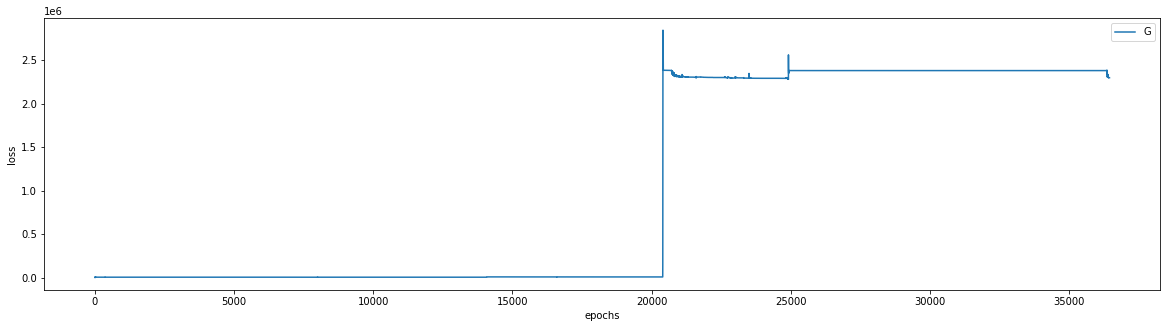

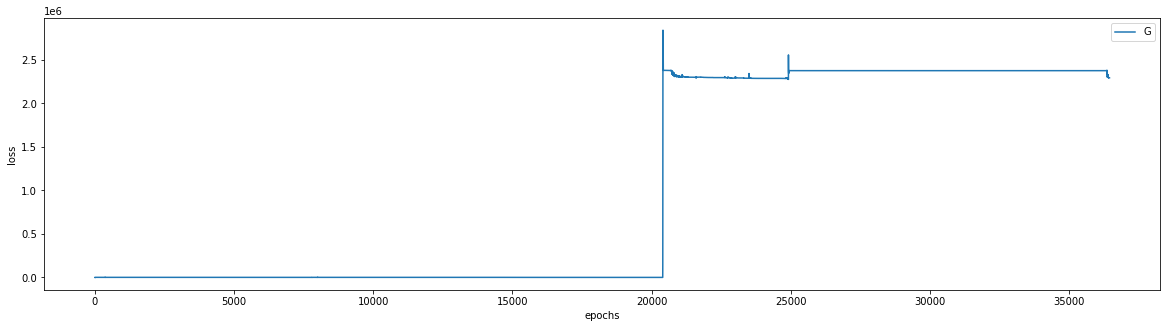

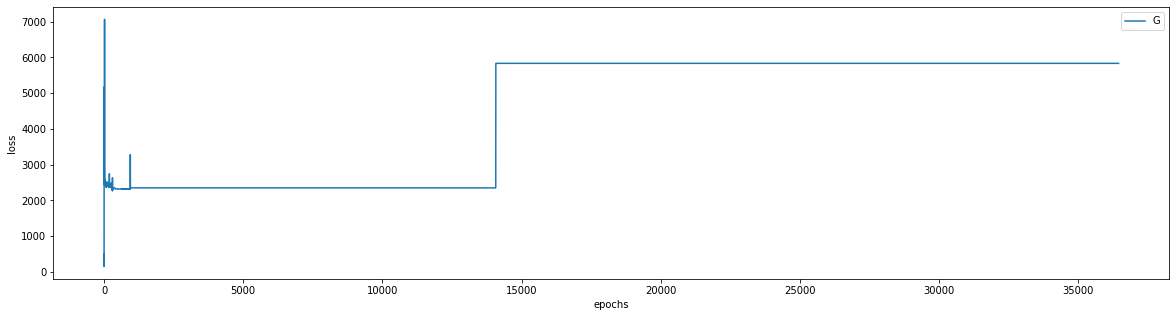

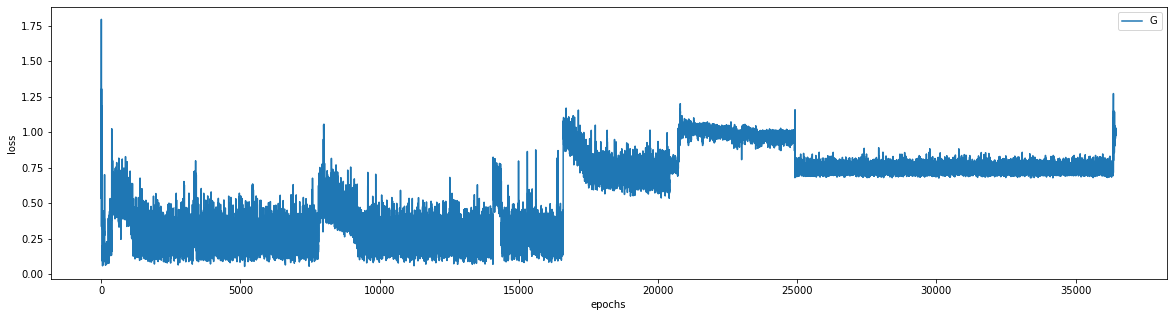

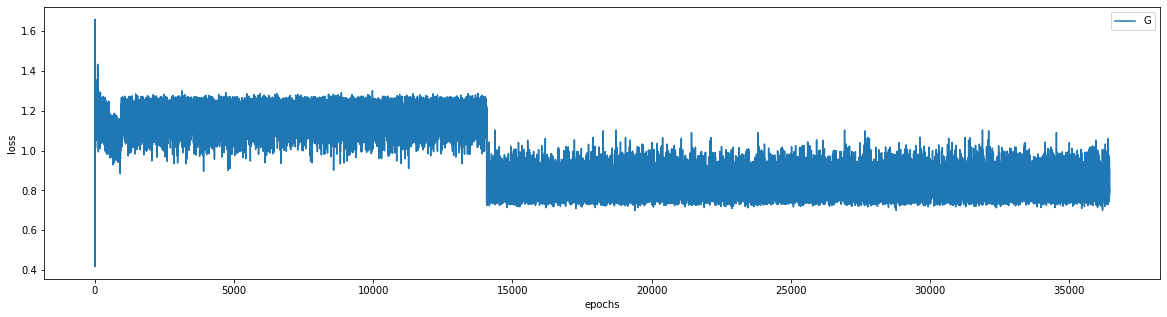

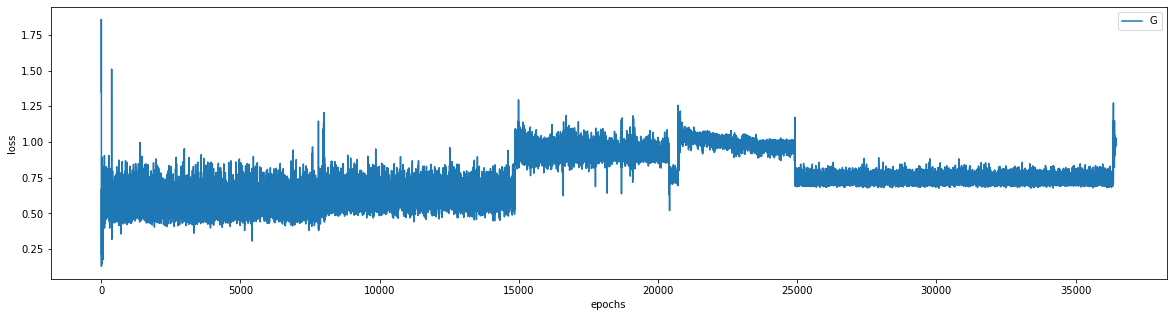

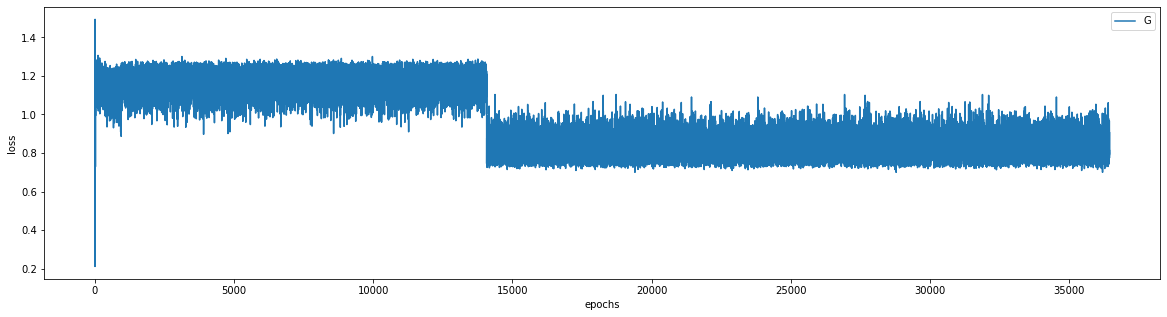

 
TRAINING TERMINE !!
Temps d execution : 6199.048907518387 secondes ---


In [55]:
%cd /content/

import numpy as np
from glob import glob

image_helper = ImageHelper()

print("Ploting the images...")
filenames = np.array(glob('MNIST_to_USPS/testA/*.png'))
image_helper.plot20(filenames)

cycle_lambda = 10
generative_advarsial_network = CycleGAN((128, 128, 3), cycle_lambda, image_helper)

# GPU
#generative_advarsial_network = generative_advarsial_network.to("cuda")
# il y a une erreur : AttributeError: 'CycleGAN' object has no attribute '_modules'

import time

# Debut du decompte du temps
start_time = time.time()

# Training
generative_advarsial_network.train(epoque, batch_size, "MNIST_to_USPS") # 3643 batchs par epoque avec un batch size = 2

# Affichage du temps d execution
print("Temps d execution : %s secondes ---" % (time.time() - start_time))
# Temps d execution : 16184.28904914856 secondes par epoque avec batch size = 2

In [0]:
# choix de l'image à afficher
# num_batch doit être un multiple de 100

num_epoque = 0
num_batch = 400 

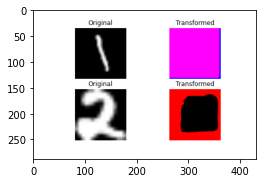

In [57]:
# chemin de l'image à afficher
path_result = 'cycle_gan_images/' + str(num_epoque) + '_' + str(num_batch) + '.png'

#Visualization
import imageio
import numpy
from matplotlib.pyplot import *

img = imread(path_result)

figure(figsize=(4,4))
imshow(img)

In [0]:
# choix de l'image à afficher
# num_batch doit être un multiple de 100

num_epoque = 4
num_batch = 400 

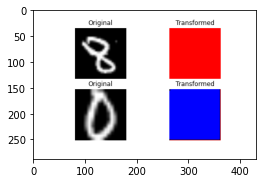

In [59]:
# chemin de l'image à afficher
path_result = 'cycle_gan_images/' + str(num_epoque) + '_' + str(num_batch) + '.png'

#Visualization
import imageio
import numpy
from matplotlib.pyplot import *

img = imread(path_result)

figure(figsize=(4,4))
imshow(img)

/content
Ploting the images...


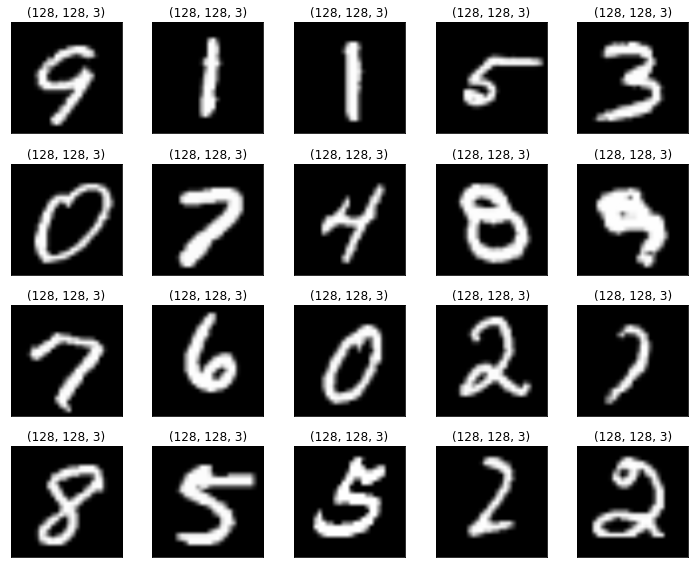

Build Discriminators...
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 64, 64, 64)        3136      
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 32, 32, 128)       131200    
_________________________________________________________________
leaky_re_lu_50 (LeakyReLU)   (None, 32, 32, 128)       0         
_________________________________________________________________
instance_normalization_61 (I (None, 32, 32, 128)       2         
_________________________________________________________________
conv2d_81 (Conv2D)           (None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Train Discriminators...


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train Generators...
Discriminator loss: 8.98443603515625
Generator loss: 732.1519775390625
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 0 | Batch 1 ***************************
Generate images...
Train Discriminators...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: `imresize` is deprecated!
`imresi

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
****************** Epoch 4 | Batch 6665 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.666619300842285
Generator loss: 5266308.5
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 4 | Batch 6666 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.666619300842285
Generator loss: 5266350.0
---------------------------------------------------------
---------------------------------------------------------
****************** Epoch 4 | Batch 6667 ***************************
Generate images...
Train Discriminators...
Train Generators...
Discriminator loss: 7.666619300842285
Generator loss: 5266332.5
---------------------------------------------------------
-----------------------------------------------

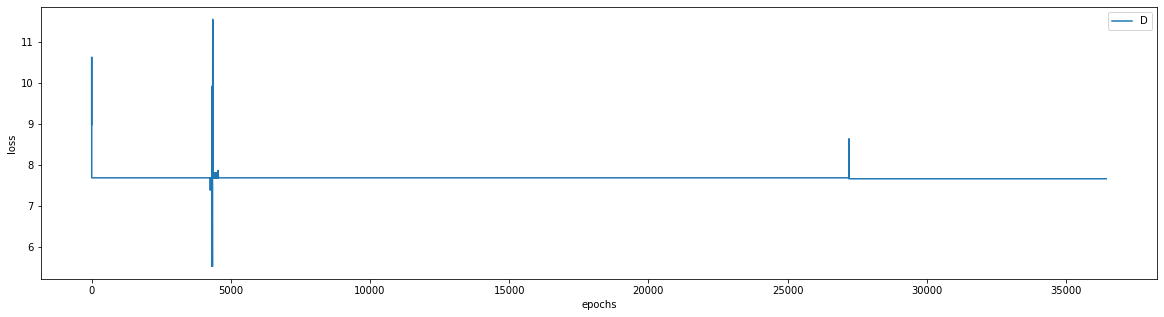

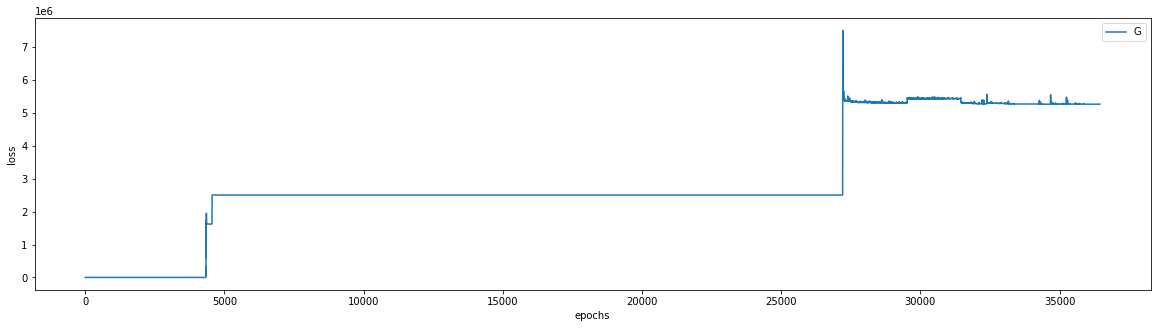

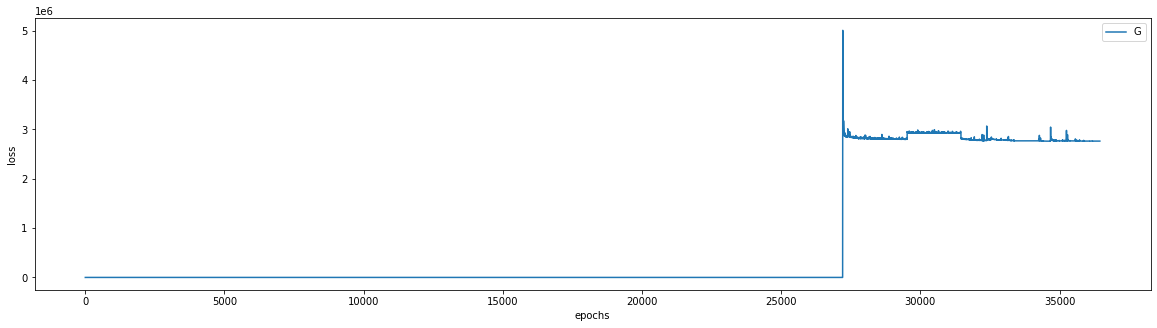

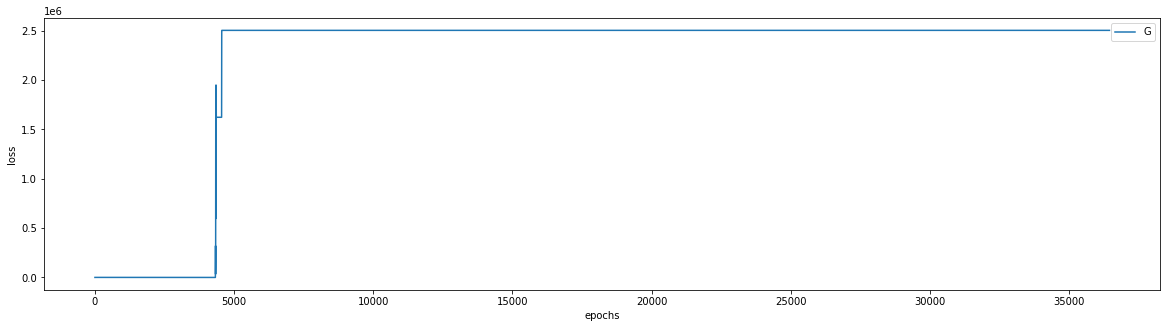

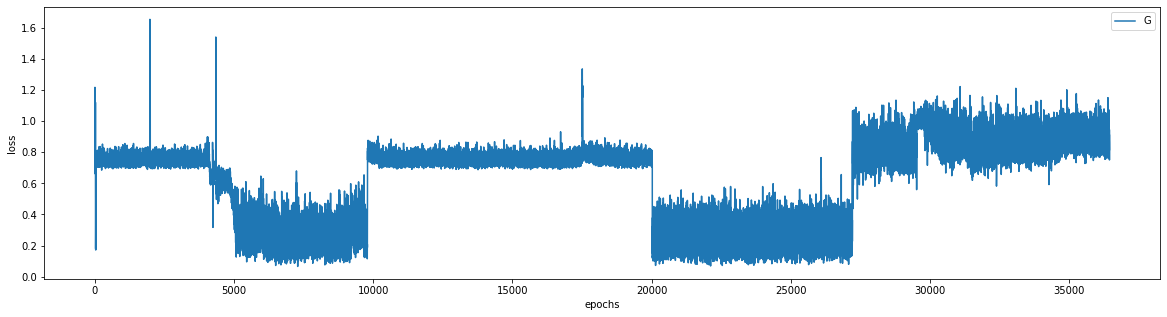

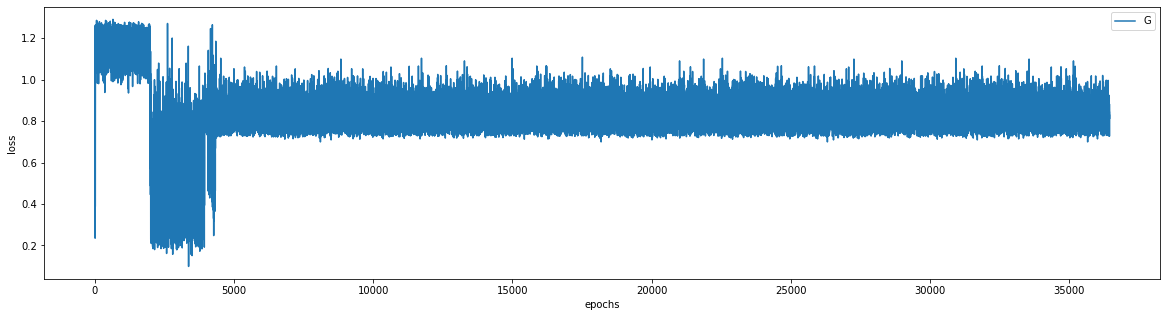

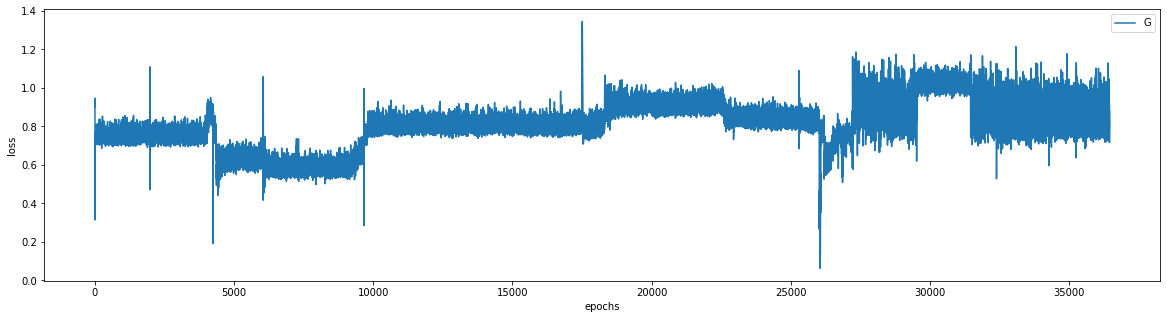

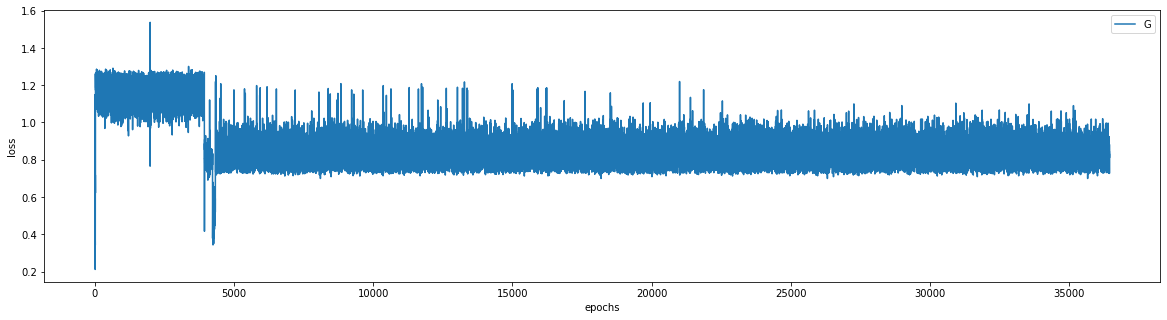

 
TRAINING TERMINE !!
Temps d execution : 6411.784770727158 secondes ---


In [60]:
### Avec des tenseurs (128,128,3)

%cd /content/

import numpy as np
from glob import glob

image_helper = ImageHelper()

print("Ploting the images...")
filenames = np.array(glob('/content/BDD_tensor/testA/*.png'))
image_helper.plot20(filenames)

cycle_lambda = 10
generative_advarsial_network = CycleGAN((128, 128, 3), cycle_lambda, image_helper) 

# GPU
#generative_advarsial_network = generative_advarsial_network.to("cuda")
# il y a une erreur : AttributeError: 'CycleGAN' object has no attribute '_modules'

import time

# Debut du decompte du temps
start_time = time.time()

# Training
generative_advarsial_network.train(epoque, batch_size, "BDD_tensor") 

# Affichage du temps d execution
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

In [0]:
# choix de l'image à afficher
# num_batch doit être un multiple de 100

num_epoque = 0
num_batch = 400 

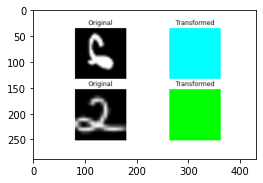

In [62]:
# chemin de l'image à afficher
path_result = 'cycle_gan_images/' + str(num_epoque) + '_' + str(num_batch) + '.png'

#Visualization
import imageio
import numpy
from matplotlib.pyplot import *

img = imread(path_result)

figure(figsize=(4,4))
imshow(img)

In [0]:
# choix de l'image à afficher
# num_batch doit être un multiple de 100

num_epoque = 4
num_batch = 400 

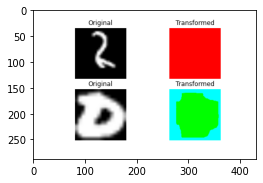

In [64]:
# chemin de l'image à afficher
path_result = 'cycle_gan_images/' + str(num_epoque) + '_' + str(num_batch) + '.png'

#Visualization
import imageio
import numpy
from matplotlib.pyplot import *

img = imread(path_result)

figure(figsize=(4,4))
imshow(img)